# Import some essential libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import numpy as np
from google.colab import drive
from functools import reduce
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap
from IPython.display import display
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<ipython-input-1-64355a966d5e>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Load dataset

In [ ]:
# Connect google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Semester_6(2023-2024)/IE224.O11.CNCL/Final Project/dataset/Forcast_temp_in_VN.csv')

## Overview dataset

In [ ]:
df.sample(10)

Location  YEAR  Month  Day  ShWave     UVA     UVB  UVindx       Lon      Lat   Temp  \
19208  TraVinh    2023  6      20   6.81    17.93   0.59    3.23    106.3346  9.9513   27.99   
7906   HaNam      2023  8      13   5.86   -999.00 -999.00 -999.00  105.9684  20.5401  28.89   
4350   DakLak     2023  1      9    2.00    6.25    0.20    1.12    108.2371  12.8706  22.26   
937    BacKan     2023  9      27   1.82   -999.00 -999.00 -999.00  105.8146  22.2890  23.76   
5362   DienBien   2023  1      19   1.91    5.05    0.16    0.88    103.1779  21.8461  10.87   
1075   BacLieu    2023  3      15   6.62    16.27   0.57    3.24    105.4850  9.3216   27.08   
3012   BinhPhuoc  2023  1      7    3.04    8.55    0.27    1.47    106.9462  11.7543  22.10   
4249   CanTho     2023  8      30   3.54   -999.00 -999.00 -999.00  105.7469  10.0452  27.87   
14067  PhuTho     2023  2      9    2.28    7.53    0.23    1.20    105.2297  21.4220  23.39   
9000   HaTinh     2023  11     13   1.05   -999.00 -999.00 -999.00  105.7652  18.2919  21.58   

       DewFrost  WBulbTemp2M  EarthSkin  SpecHumid2M RelHumid2M  Precipitation  SfPressure  \
19208  25.15     26.57        28.19      19.96        cao        1.17           100.85       
7906   26.05     27.47        29.05      21.18        cao        6.91           100.08       
4350   20.89     21.57        22.26      16.05        cao        7.72           96.78        
937    22.38     23.07        23.66      17.94        cao        14.49          94.92        
5362   8.92      9.90         10.87      7.81         cao        0.50           91.87        
1075   20.01     23.55        28.82      14.59        trungbinh  0.00           101.10       
3012   18.48     20.29        22.08      13.49        cao        0.73           98.94        
4249   25.83     26.84        27.78      20.81        cao        6.39           100.69       
14067  19.93     21.65        23.65      14.77        cao        1.44           98.85        
9000   20.38     20.98        21.83      14.95        cao        76.91          101.00       

       WiSpeed2M WiDirect2M  WiSpeed10M WiDirect10M  WSfSoil  \
19208  2.78       TayNam     3.86        TayNam      0.77      
7906   1.23       TayNam     1.72        TayNam     -999.00    
4350   0.02       Dong       1.89        DongBac     0.86      
937    1.41       Dong       3.17        Dong       -999.00    
5362   0.12       Dong       1.01        Dong        0.76      
1075   4.51       Dong       6.03        Dong        0.37      
3012   0.20       Dong       2.16        DongBac     0.73      
4249   2.78       Tay        4.05        Tay        -999.00    
14067  1.29       DongNam    2.02        DongNam     0.69      
9000   5.46       Bac        7.75        Bac        -999.00    

                                     Region                                       Farming  \
19208  Dong_bang_song_Cuu_Long               ['lua', 'khoai', 'lac', 'mia', 'cam']          
7906   Dong_bang_song_Hong                   ?                                              
4350   TayNguyen                             ['lua', 'khoai', 'lac', 'mia', 'ngo', 'san']   
937    Trung_du_mien_nui_phia_Bac            ['ngo', 'che']                                 
5362   Trung_du_mien_nui_phia_Bac            ['ngo', 'san']                                 
1075   Dong_bang_song_Cuu_Long               ['lua', 'mia']                                 
3012   Dong_Nam_Bo                           ['san']                                        
4249   Dong_bang_song_Cuu_Long               ['lua', 'cam']                                 
14067  Trung_du_mien_nui_phia_Bac            ['lac', 'ngo', 'che', 'san']                   
9000   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  ['lua', 'khoai', 'lac', 'ngo', 'cam', 'san']   

                               Rearing        Fishery  
19208  ['bo', 'giacam']                 ['ca', 'tom']  
7906   ['heo', 'giacam']                ['ca']         
4350   ['bo', 'trau

In [ ]:
# Check some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21042 entries, 0 to 21041
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21042 non-null  object 
 1   YEAR           21042 non-null  int64  
 2   Month          21042 non-null  int64  
 3   Day            21042 non-null  int64  
 4   ShWave         21042 non-null  float64
 5   UVA            21042 non-null  float64
 6   UVB            21042 non-null  float64
 7   UVindx         21042 non-null  float64
 8   Lon            21042 non-null  float64
 9   Lat            21042 non-null  float64
 10  Temp           21042 non-null  float64
 11  DewFrost       21042 non-null  float64
 12  WBulbTemp2M    21042 non-null  float64
 13  EarthSkin      21042 non-null  float64
 14  SpecHumid2M    21042 non-null  float64
 15  RelHumid2M     21042 non-null  object 
 16  Precipitation  21042 non-null  float64
 17  SfPressure     21042 non-null  float64
 18  WiSpee

In [ ]:
# Check general statistics
df.describe(include= 'all')

Location     YEAR         Month           Day        ShWave           UVA           UVB  \
count   21042    21042.0  21042.000000  21042.000000  21042.000000  21042.000000  21042.000000   
unique  63      NaN      NaN           NaN           NaN           NaN           NaN             
top     AnGiang NaN      NaN           NaN           NaN           NaN           NaN             
freq    334     NaN      NaN           NaN           NaN           NaN           NaN             
mean    NaN      2023.0   6.017964      15.694611     4.551340     -354.059848   -361.660246     
std     NaN      0.0      3.154718      8.782139      1.556364      486.118459    480.379232     
min     NaN      2023.0   1.000000      1.000000      0.270000     -999.000000   -999.000000     
25%     NaN      2023.0   3.000000      8.000000      3.462500     -999.000000   -999.000000     
50%     NaN      2023.0   6.000000      16.000000     4.790000      8.730000      0.270000       
75%     NaN      2023.0   9.000000      23.000000     5.750000      14.197500     0.470000       
max     NaN      2023.0   11.000000     31.000000     8.040000      20.990000     0.700000       

              UVindx           Lon           Lat          Temp      DewFrost   WBulbTemp2M  \
count   21042.000000  21042.000000  21042.000000  21042.000000  21042.000000  21042.000000   
unique NaN           NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN           NaN             
mean   -362.449646    106.383586    16.088887     25.212241     21.636314     23.424211      
std     481.760334    1.333894      4.894432      4.185145      4.351727      4.136037       
min    -999.000000    103.177900    9.036900      6.270000     -1.220000      3.350000       
25%    -999.000000    105.655300    10.950600     23.370000     19.750000     21.840000      
50%     1.380000      106.200000    16.047100     26.370000     22.850000     24.650000      
75%     2.520000      107.211500    21.033300     27.940000     24.870000     26.400000      
max     3.940000      109.092900    22.771000     35.400000     27.940000     29.240000      

           EarthSkin   SpecHumid2M RelHumid2M  Precipitation    SfPressure     WiSpeed2M  \
count   21042.000000  21042.000000  21042      21042.000000   21042.000000  21042.000000   
unique NaN           NaN            3         NaN            NaN           NaN             
top    NaN           NaN            cao       NaN            NaN           NaN             
freq   NaN           NaN            18923     NaN            NaN           NaN             
mean    25.414646     17.006124     NaN        5.797993       98.271900     1.804289       
std     4.402406      3.690590      NaN        13.282665      3.235819      1.242004       
min     6.570000      3.540000      NaN        0.000000       87.960000     0.020000       
25%     23.370000     14.830000     NaN        0.140000       96.452500     0.860000       
50%     26.470000     18.130000     NaN        1.840000       99.540000     1.660000       
75%     28.150000     19.840000     NaN        6.027500       100.740000    2.537500       
max     37.230000     23.740000     NaN        373.840000     102.680000    9.560000       

       WiDirect2M    WiSpeed10M WiDirect10M       WSfSoil                      Region  \
count   21042      21042.000000  21042       21042.000000  21042                        
unique  8         NaN            8          NaN            6                            
top     TayNam    NaN            TayNam     NaN            Trung_du_mien_nui_phia_Bac   
freq    4253      NaN            4230       NaN            4676                         
mean    NaN        2.841497      NaN        -361.482092    NaN                          
std     NaN        1.403077      NaN         480.513512    NaN

In [ ]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
df.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


Location         63  
YEAR             1   
Month            11  
Day              31  
ShWave           708 
UVA              1542
UVB              67  
UVindx           339 
Lon              63  
Lat              63  
Temp             2071
DewFrost         1942
WBulbTemp2M      1882
EarthSkin        2259
SpecHumid2M      324 
RelHumid2M       3   
Precipitation    2657
SfPressure       1336
WiSpeed2M        673 
WiDirect2M       8   
WiSpeed10M       787 
WiDirect10M      8   
WSfSoil          82  
Region           6   
Farming          50  
Rearing          15  
Fishery          4   
dtype: int64

**Nhận xét:** Thông qua kết quả thống kê được ở trên, dữ liệu bao gồm:
* 8 biến dữ liệu kiểu phân loại.
* 19 biến dữ liệu kiểu số.
* Không có giá trị null trong dữ liệu.

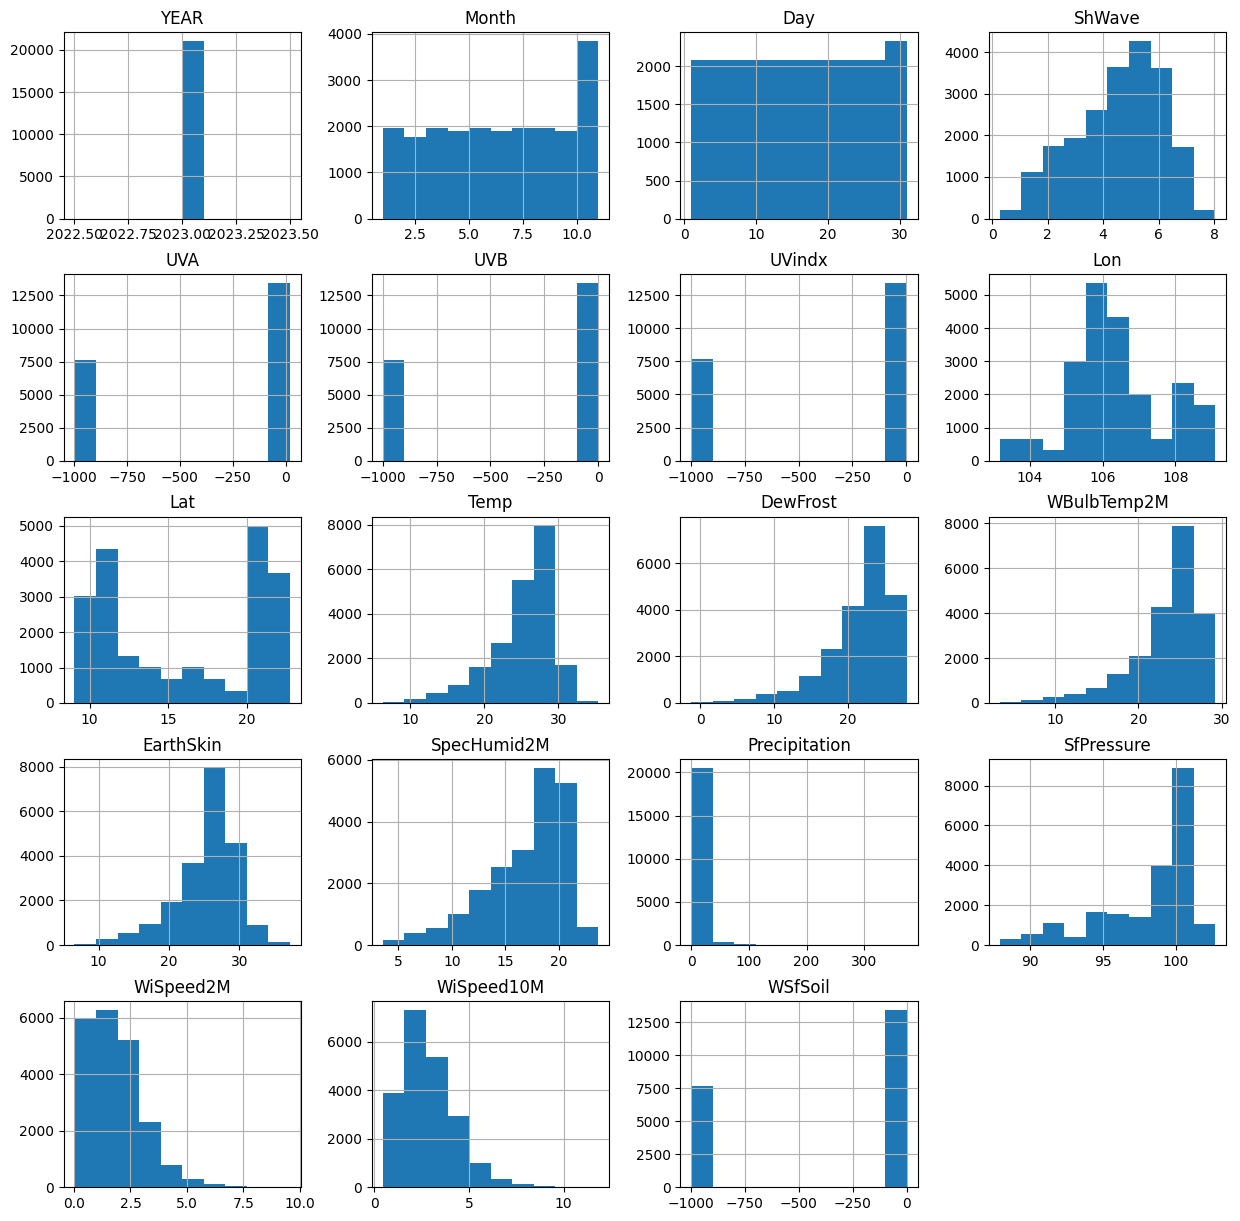

In [ ]:
df.hist(figsize=(15,15));

# Pre-processing

## Handle missing values

In [ ]:
# Since Farming, Rearing, Fishery columns contain the large number of '?' values
# and those features are related each other therefore, we will carry out merging
# them to one feature in order to reduce spare space.

tmp = df.copy() #create a copy dataframe to preprocess


def convert_type(df, feature):
  """
  Because loading dataset file, Farming, Rearing, Fishery columns will read as
  string type, we need to convert to list in order to process simply.

  Parameters:
    df: dataframe
    feature: column needed to convert

  Return:
    Result will update in df
  """
  df[feature] = df[feature].apply(lambda row: row.replace('[', '').replace(']', '').replace("'", ''))
  df[feature] = df[feature].astype(str)
  df[feature] = df[feature].apply(lambda row: row.split(','))


In [ ]:
convert_type(tmp, 'Farming')
convert_type(tmp, 'Rearing')
convert_type(tmp, 'Fishery')

In [ ]:
# Merge features and ignore '?' value

tmp['Agriculture'] = tmp.apply(lambda row: [value for value in [row['Farming'], row['Rearing'], row['Fishery']] if value != '?'], axis=1)
tmp['Agriculture'] = tmp['Agriculture'].apply(lambda x: sum(x, []))
tmp['Agriculture'] = tmp['Agriculture'].apply(lambda row: [item.replace(' ','') for item in row if item != '?'])

In [ ]:
tmp['Agriculture'].value_counts()

[lua, mia, ca, tom]                                                           668
[lua, ngo, ca]                                                                334
[khoai, lac, san, trau, tom]                                                  334
[khoai, lac, ngo, trau]                                                       334
[ngo, che, san, trau, heo]                                                    334
[lua, bo, giacam, ca, tom]                                                    334
[lua, khoai, lac, heo, giacam, ca, tom]                                       334
[lua, khoai, lac, mia, ca, tom]                                               334
[lua, khoai, lac, mia, ngo, cam, che, san, bo, trau, heo, giacam, ca, tom]    334
[mia, ngo, bo, tom]                                                           334
[lac, ngo, che, san, bo, trau, heo, giacam, ca]                               334
[mia, san, bo, tom]                                                           334
[khoai, lac, san

In [ ]:
# drop some columns merged
tmp.drop(['Farming', 'Rearing', 'Fishery'], axis=1, inplace=True)

In [ ]:
tmp.sample(5)

Location  YEAR  Month  Day  ShWave     UVA     UVB  UVindx       Lon      Lat   Temp  \
7084   HaiDuong   2023  3      12   3.87    8.52    0.26    1.36    106.3306  20.9397  21.01   
16690  SocTrang   2023  11     21   3.85   -999.00 -999.00 -999.00  105.9739  9.6025   27.41   
14985  QuangBinh  2023  10     17   1.93   -999.00 -999.00 -999.00  106.3487  17.6103  24.16   
373    BacGiang   2023  2      9    1.54    4.58    0.13    0.73    106.2000  21.2667  21.95   
8424   HaNoi      2023  3      16   2.83    7.97    0.24    1.27    105.8500  21.0333  21.92   

       DewFrost  WBulbTemp2M  EarthSkin  SpecHumid2M RelHumid2M  Precipitation  SfPressure  \
7084   16.61     18.81        20.89      11.84        cao        0.60           101.64       
16690  24.12     25.76        27.71      18.68        cao        0.34           101.01       
14985  22.52     23.34        24.29      17.64        cao        14.24          97.40        
373    20.14     21.05        22.35      14.89        cao        5.13           99.37        
8424   19.33     20.62        22.20      13.98        cao        3.37           100.49       

       WiSpeed2M WiDirect2M  WiSpeed10M WiDirect10M  WSfSoil  \
7084   2.75       DongBac    3.92        DongBac     0.66      
16690  5.59       DongBac    6.91        DongBac    -999.00    
14985  0.59       Bac        3.31        Bac        -999.00    
373    2.56       DongNam    3.62        DongNam     0.77      
8424   2.85       DongNam    4.05        DongNam     0.70      

                                     Region  \
7084   Dong_bang_song_Hong                    
16690  Dong_bang_song_Cuu_Long                
14985  Bac_Trung_Bo_va_Duyen_hai_mien_Trung   
373    Trung_du_mien_nui_phia_Bac             
8424   Dong_bang_song_Hong                    

                                                  Agriculture  
7084   [lua, khoai, heo, giacam, ca]                           
16690  [lua, mia, cam, ca, tom]                                
14985  [khoai, lac, san, bo, trau]                             
373    [lua, khoai, lac, cam, bo, trau, heo, giacam, ca]       
8424   [lua, khoai, lac, ngo, che, bo, trau, heo, giacam, ca]

In [ ]:
# Some features in dataset will have values is -999 which seen as missing values
# we will convert them to null before next processing

tmp.replace(-999, np.nan, inplace=True)

In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21042 entries, 0 to 21041
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21042 non-null  object 
 1   YEAR           21042 non-null  int64  
 2   Month          21042 non-null  int64  
 3   Day            21042 non-null  int64  
 4   ShWave         21042 non-null  float64
 5   UVA            13419 non-null  float64
 6   UVB            13419 non-null  float64
 7   UVindx         13379 non-null  float64
 8   Lon            21042 non-null  float64
 9   Lat            21042 non-null  float64
 10  Temp           21042 non-null  float64
 11  DewFrost       21042 non-null  float64
 12  WBulbTemp2M    21042 non-null  float64
 13  EarthSkin      21042 non-null  float64
 14  SpecHumid2M    21042 non-null  float64
 15  RelHumid2M     21042 non-null  object 
 16  Precipitation  21042 non-null  float64
 17  SfPressure     21042 non-null  float64
 18  WiSpee

**Nhận xét:** Sau khi xử lý gom cột và tìm giá trị khuyết, ta thu được kết quả:
* Bộ dữ liệu còn 6 biến phân loại và 19 biến số
* Một số features có giá trị null như: `WSfSoil`, `UVindx`, `UVA`, `UVB`

In [ ]:
# Replace null values by mean values

tmp['WSfSoil'].fillna(tmp['WSfSoil'].mean(), inplace=True)
tmp['UVindx'].fillna(tmp['UVindx'].mean(), inplace=True)
tmp['UVA'].fillna(tmp['UVA'].mean(), inplace=True)
tmp['UVB'].fillna(tmp['UVB'].mean(), inplace=True)

In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21042 entries, 0 to 21041
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21042 non-null  object 
 1   YEAR           21042 non-null  int64  
 2   Month          21042 non-null  int64  
 3   Day            21042 non-null  int64  
 4   ShWave         21042 non-null  float64
 5   UVA            21042 non-null  float64
 6   UVB            21042 non-null  float64
 7   UVindx         21042 non-null  float64
 8   Lon            21042 non-null  float64
 9   Lat            21042 non-null  float64
 10  Temp           21042 non-null  float64
 11  DewFrost       21042 non-null  float64
 12  WBulbTemp2M    21042 non-null  float64
 13  EarthSkin      21042 non-null  float64
 14  SpecHumid2M    21042 non-null  float64
 15  RelHumid2M     21042 non-null  object 
 16  Precipitation  21042 non-null  float64
 17  SfPressure     21042 non-null  float64
 18  WiSpee

## Convert datatype

In [ ]:
tmp['DateTime'] = tmp.apply(lambda row: f"{row['Day']:02d}-{row['Month']:02d}-{row['YEAR']}", axis=1)

In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21042 entries, 0 to 21041
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21042 non-null  object 
 1   YEAR           21042 non-null  int64  
 2   Month          21042 non-null  int64  
 3   Day            21042 non-null  int64  
 4   ShWave         21042 non-null  float64
 5   UVA            21042 non-null  float64
 6   UVB            21042 non-null  float64
 7   UVindx         21042 non-null  float64
 8   Lon            21042 non-null  float64
 9   Lat            21042 non-null  float64
 10  Temp           21042 non-null  float64
 11  DewFrost       21042 non-null  float64
 12  WBulbTemp2M    21042 non-null  float64
 13  EarthSkin      21042 non-null  float64
 14  SpecHumid2M    21042 non-null  float64
 15  RelHumid2M     21042 non-null  object 
 16  Precipitation  21042 non-null  float64
 17  SfPressure     21042 non-null  float64
 18  WiSpee

# Exploratory data analysis

## **Temp**

In [ ]:
def draw_gaugechart(val, title):
  gauge_chart = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = val,
    mode = "gauge+number",
    title = {'text': title},
    gauge = {'axis': {'range': [None, 40]},
             'bar': {'color': "darkblue"},
             'steps' : [
                 {'range': [0, 10], 'color': "lightgray"},
                 {'range': [10, 20], 'color': "gray"}],
             }))
  gauge_chart.show()

**Minimum temperature**

In [ ]:
draw_gaugechart(tmp['Temp'].min(), 'Minimum temperature')

**Maximum temperature**

In [ ]:
draw_gaugechart(tmp['Temp'].max(), 'Maximum temperature')

**Average temperature**

In [ ]:
draw_gaugechart(tmp['Temp'].mean(), 'Average temperature')

**Temperature trend**

In [ ]:
# Create a list of all unique city names
cities = tmp['Location'].unique()

# Initialize dictionaries to store the maximum and minimum temperatures for each city
max_temperatures = {}
min_temperatures = {}

# Iterate through the cities and calculate the maximum and minimum temperatures
for city in cities:
    city_data = tmp[tmp['Location'] == city]
    max_temp = city_data['Temp'].max()
    min_temp = city_data['Temp'].min()
    max_temperatures[city] = max_temp
    min_temperatures[city] = min_temp

# Sort the cities by maximum and minimum temperatures
top_10_max = sorted(max_temperatures.items(), key=lambda x: x[1], reverse=True)[:10]
bottom_10_min = sorted(min_temperatures.items(), key=lambda x: x[1])[:10]

# Create dynamic visualizations using Plotly
def create_bar_chart(data, title, color):
    fig = px.bar(data, x='City', y='Temperature (°C)', title=title)
    fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1)
    fig.update_xaxes(categoryorder='total ascending')
    return fig

# Define custom colors for the bars
top_chart_color = 'rgb(255, 87, 51)'  # Blue
bottom_chart_color = 'rgb(75, 136, 230)'  # Red

# Create interactive bar charts for the top 10 and bottom 10 cities with custom colors
top_10_max_df = pd.DataFrame(top_10_max, columns=['City', 'Temperature (°C)'])
bottom_10_min_df = pd.DataFrame(bottom_10_min, columns=['City', 'Temperature (°C)'])

top_chart = create_bar_chart(top_10_max_df, 'Top 10 Cities by Maximum Temperature', top_chart_color)
bottom_chart = create_bar_chart(bottom_10_min_df, 'Bottom 10 Cities by Minimum Temperature', bottom_chart_color)

# Display the interactive charts side by side
fig = make_subplots(rows=1, cols=2, subplot_titles=('10 Cities with Highest Temperature', '10 Cities with Lowest Temperature'))
fig.add_trace(top_chart.data[0], row=1, col=1)
fig.add_trace(bottom_chart.data[0], row=1, col=2)

fig.update_layout(showlegend=False)
fig.show()


**The highest temperature**

In [ ]:
tmp.nlargest(10, 'Temp')[['Location', 'Region', 'Temp', 'YEAR', 'Month', 'Day']]

Location                                Region   Temp  YEAR  Month  Day
8809   HaTinh   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  35.40  2023  5      6  
13485  NgheAn   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  35.40  2023  5      6  
17159  TayNinh  Dong_Nam_Bo                           34.58  2023  5      6  
8810   HaTinh   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  34.20  2023  5      7  
13486  NgheAn   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  34.20  2023  5      7  
17156  TayNinh  Dong_Nam_Bo                           34.19  2023  5      3  
17137  TayNinh  Dong_Nam_Bo                           34.10  2023  4      14 
17155  TayNinh  Dong_Nam_Bo                           34.04  2023  5      2  
8808   HaTinh   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  34.01  2023  5      5  
13484  NgheAn   Bac_Trung_Bo_va_Duyen_hai_mien_Trung  34.01  2023  5      5

**The lowest temperature**

In [ ]:
tmp.nsmallest(10, 'Temp')[['Location', 'Region', 'Temp', 'YEAR', 'Month', 'Day']]


Location                      Region  Temp  YEAR  Month  Day
7364   HaGiang  Trung_du_mien_nui_phia_Bac  6.27  2023  1      17 
7363   HaGiang  Trung_du_mien_nui_phia_Bac  6.41  2023  1      16 
7365   HaGiang  Trung_du_mien_nui_phia_Bac  6.68  2023  1      18 
3689   CaoBang  Trung_du_mien_nui_phia_Bac  6.73  2023  1      16 
7372   HaGiang  Trung_du_mien_nui_phia_Bac  6.87  2023  1      25 
3698   CaoBang  Trung_du_mien_nui_phia_Bac  7.01  2023  1      25 
3690   CaoBang  Trung_du_mien_nui_phia_Bac  7.03  2023  1      17 
692    BacKan   Trung_du_mien_nui_phia_Bac  7.24  2023  1      25 
11705  LangSon  Trung_du_mien_nui_phia_Bac  7.33  2023  1      16 
11706  LangSon  Trung_du_mien_nui_phia_Bac  7.45  2023  1      17

## **Location & Region**

In [ ]:
regions = tmp['Region'].value_counts().index.to_list()

In [ ]:
# fields = tmp.query("Region in @regions")
fig = px.sunburst(
    tmp,
    path=['Region', 'Location'], # Define the hierarchical path
    values='Temp', # Add values
    height=600,
    color='Temp',  # Color based on temperature
    color_continuous_scale='thermal', # Use the Temps color scale
    color_continuous_midpoint=np.mean(tmp['Temp']), # Set color midpoint to the median temperature
    labels={'Temp': 'Temperature (°C)'},  # Customize the colorbar label
)

# Set title
fig.update_layout(
    title="Average Temperature by Location and Region",
    title_font=dict(size=25),  # Set font size to 25
    title_font_color="royalblue",   # Set font color to blue
    title_x=0.5,               # Center the title horizontally
)

fig.show()

In [ ]:
mean_temp_location = tmp.groupby('Location')['Temp'].mean().reset_index().sort_values(by='Temp', ascending=False)

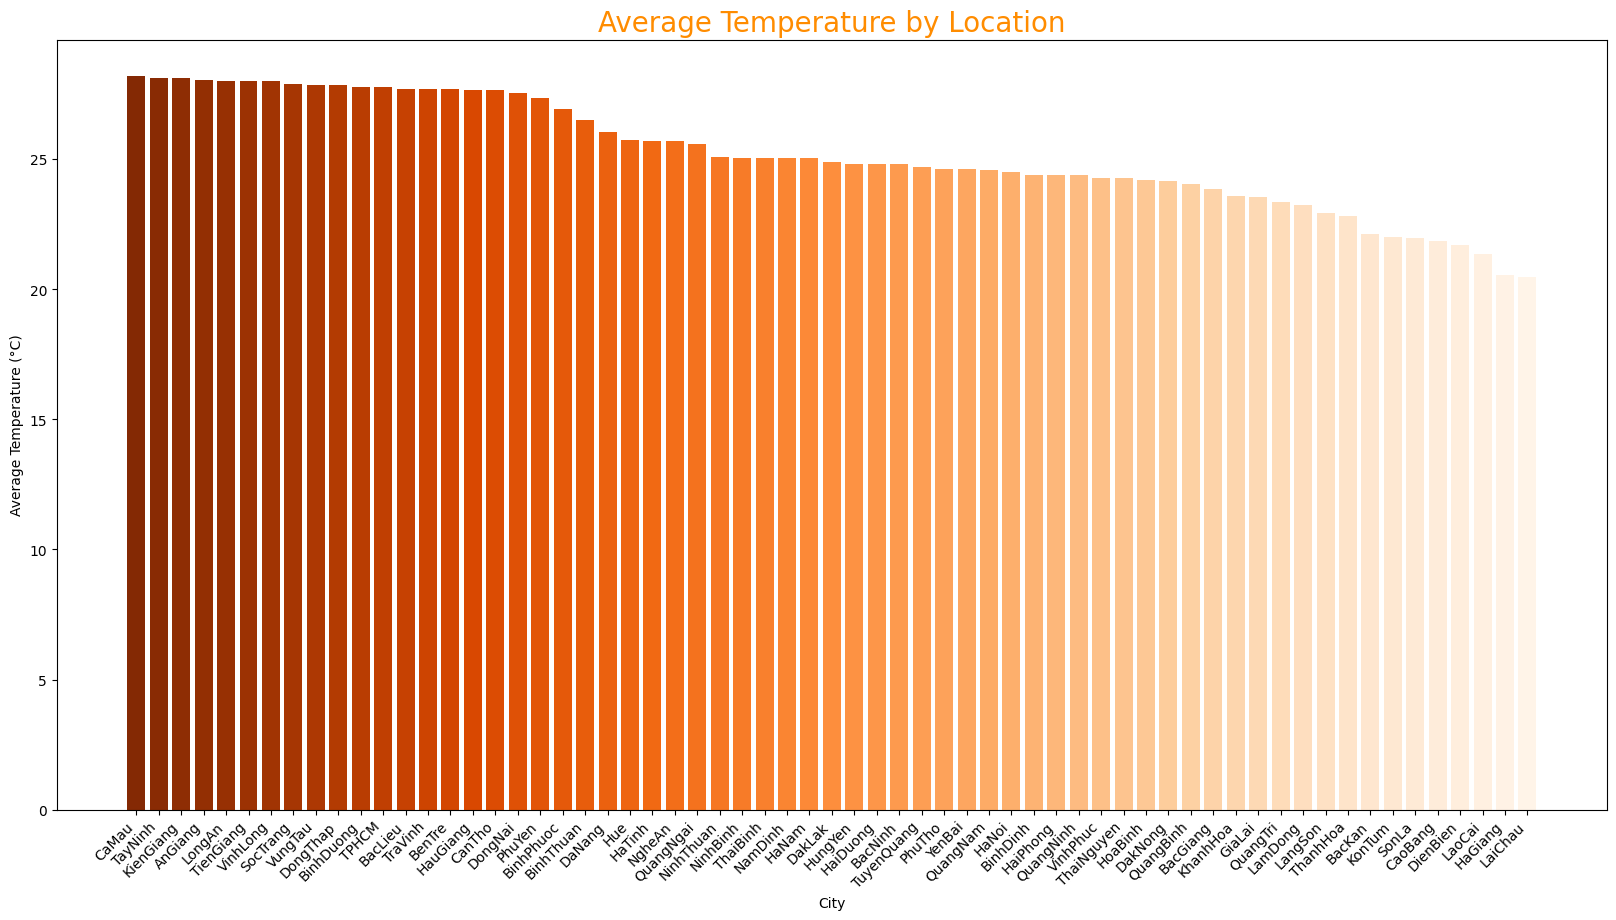

In [ ]:
plt.figure(figsize=(20, 10))
palette = sns.color_palette('Oranges_r', n_colors=len(mean_temp_location))
plt.bar(mean_temp_location['Location'], mean_temp_location['Temp'], color=palette)
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Location', color='darkorange', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
trend = tmp.query("Location in ['CaMau', 'LaiChau']")

In [ ]:
# Selected Countires Temperature Trends
fig = px.line(trend,x='DateTime',y='Temp',title="Temperature Trends",color="Location",markers=True)
fig.update_xaxes(title="Date Time")
fig.update_yaxes(title="Temperature (°C)")

# Customize the text labels
fig.update_traces(
    textposition='top center',  # Adjust text label position
    textfont=dict(size=12),  # Adjust text label font size
)

# Customize the legend
fig.update_layout(
    legend_title_text='Location',# Change the legend title
    title_font_color="royalblue",   # Set font color to blue
    title_x=0.5,               # Center the title horizontally
    title_font=dict(size=25),  # Set font size to 25
    height=600,
    width=1200,
)


# Customize the line and marker styles
fig.update_traces(
    line=dict(width=3),  # Adjust line width
    marker=dict(size=2, line=dict(width=1, color='DarkSlateGrey')),  # Adjust marker size and outline
)


fig.show()

## **Wind Speed and Wind Direction**

In [ ]:
def draw_scatter_polar(data, speed, direct, name):
  fig = px.scatter_polar(
    data,
    r= speed, # Radial distance represents wind speed in kilometers per hour
    theta= direct, # Angular position represents wind direction
    color="Temp", # Color represents temperature in degrees Celsius
    # color_continuous_scale = "viridis", # Use viridis color scale
    labels={'Temp': 'Temperature (°C)'}, # Customize the colorbar label
    height=600, # Add height to the polar chart
    hover_name="Location", # Add location names as hover text
  )

  fig.update_layout(
      title= name,
      title_font=dict(size=25),  # Set font size to 25
      title_font_color="royalblue",   # Set font color to blue
      title_x=0.5,               # Center the title horizontally
  )

  fig.show()

**Wind level in 2M**

In [ ]:
draw_scatter_polar(tmp, "WiSpeed2M", "WiDirect2M", "Wind Speed and Wind Direction in 2M")

**Wind level in 10M**

In [ ]:
draw_scatter_polar(tmp, "WiSpeed10M", "WiDirect10M", "Wind Speed and Wind Direction in 10M")

## **Humidity**

In [ ]:
humid_type = tmp.groupby('RelHumid2M')['SpecHumid2M'].agg(['mean']).reset_index()
humid_type

RelHumid2M       mean
0  cao        17.376331
1  lytuong    13.096230
2  trungbinh  13.919678

In [ ]:
fig = px.pie(
    tmp,
    names='RelHumid2M',
    values='SpecHumid2M',
    height=700,
    hole=0.4,
    labels=(
        {
            'RelHumid2M': 'Độ ẩm tương đối',
            'SpecHumid2M': 'Độ ẩm riêng'
        }
    ),
)

# Add labels inside the pie chart section
fig.update_traces(textposition='outside', textinfo='label+percent')
fig.update_layout(
      title='Relative Humidity and Specific Humidity',
      title_font=dict(size=20),  # Set font size to 20
      title_font_color="royalblue",   # Set font color to blue
      title_x=0,               # Center the title horizontally
  )
fig.show()

In [ ]:
fig = px.scatter(
    tmp,
    x="Temp",
    y="SpecHumid2M",
    color="Temp",
    color_continuous_scale = "tempo",
    size='WiSpeed2M', # Size of data points based on wind speed in kph
    hover_name='Region', # Add hover value
    hover_data=['Location'],  # Additional data to show on hover (location_name)
    labels=
        {
            'Temp': 'Temperature (°C)',
            'SpecHumid2M': 'Humidity',
            'WiSpeed2M': 'Wind speed (kph)',
            'Location': 'City'
        },
    title="Temperature and Humidity with Wind Speed",
    height=600,
    )

fig.update_xaxes(title="Temperature (°C)")
fig.update_yaxes(title="Humidity")
fig.update_layout(
      title='Relative Humidity and Specific Humidity',
      title_font=dict(size=25),  # Set font size to 25
      title_font_color="royalblue",   # Set font color to blue
      title_x=0.5,               # Center the title horizontally
  )

fig.show()

## **Precipitation**

In [ ]:
mean_preci_location = tmp.groupby('Location')['Precipitation'].mean().reset_index().sort_values(by='Precipitation', ascending=False)

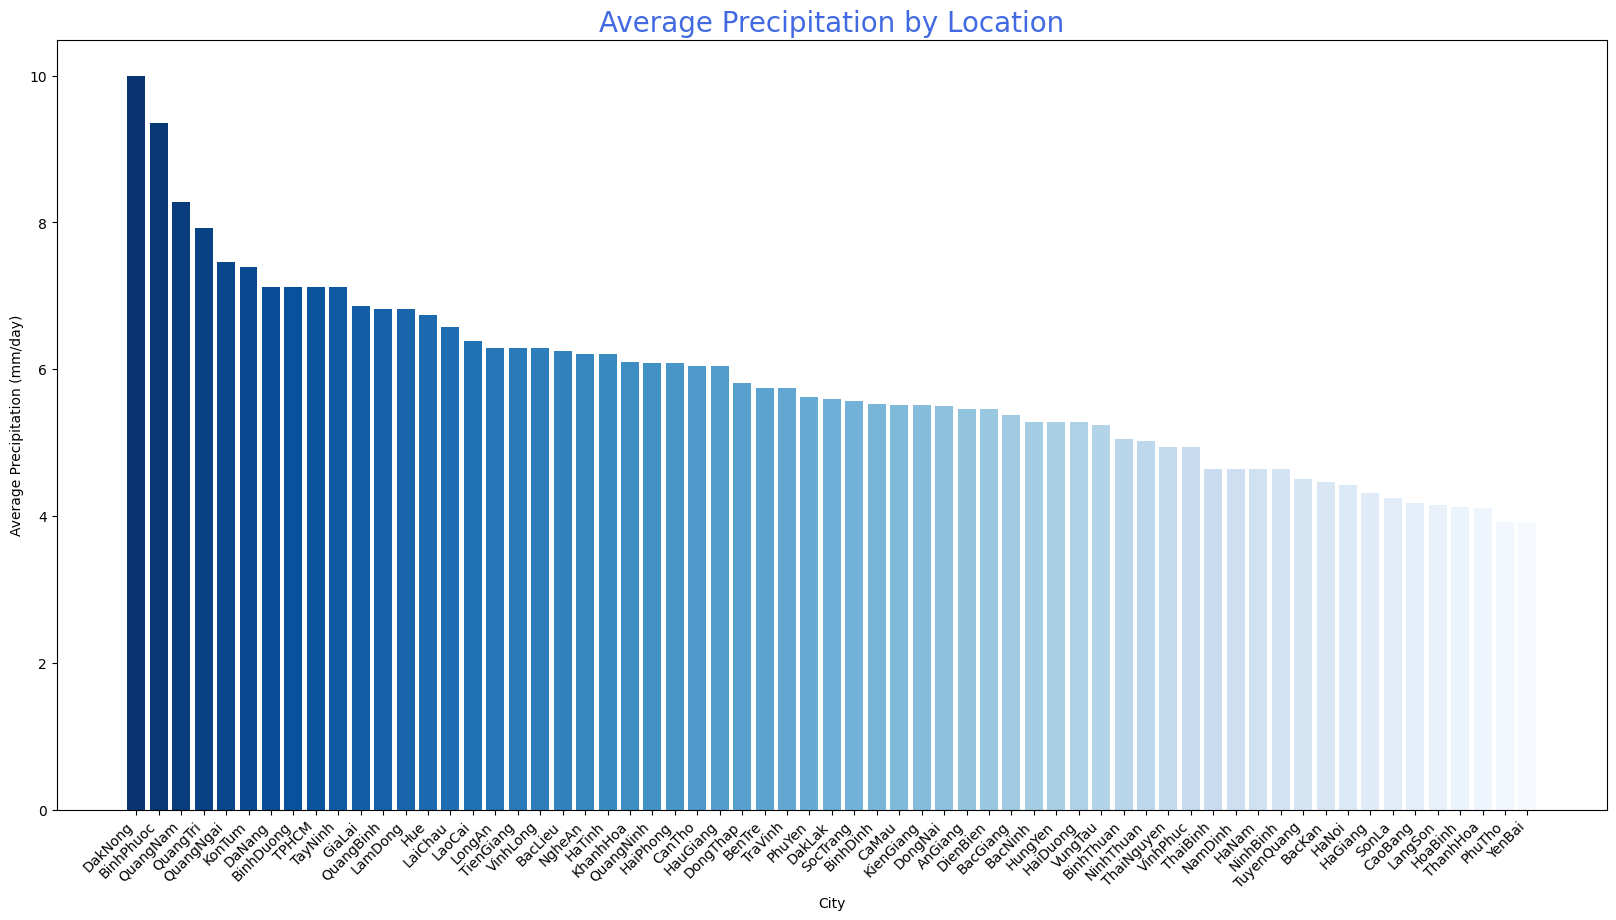

In [ ]:
plt.figure(figsize=(20, 10))
palette = sns.color_palette('Blues_r', n_colors=len(mean_preci_location))
plt.bar(mean_preci_location['Location'], mean_preci_location['Precipitation'], color=palette)
plt.xlabel('City')
plt.ylabel('Average Precipitation (mm/day)')
plt.title('Average Precipitation by Location', color='royalblue', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
merged_temp_preci = pd.merge(mean_temp_location, mean_preci_location, on='Location')

In [ ]:
fig = px.scatter(
      merged_temp_preci,
      x='Temp',
      y='Precipitation',
      hover_name='Location',
      title='Relationship between temperature and precipitation by location',
      labels=
        {
            'Temp': 'Temperature (°C)',
            'Precipitation': 'Precipitation(mm/day)'
        },
      height=600
      )
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='steelblue'), color='skyblue'), textposition='top center')

# Đặt tên trục x và trục y
fig.update_layout(xaxis_title='Temperature (°C)', yaxis_title='Precipitation (mm/day)')

# Hiển thị biểu đồ
fig.show()

In [ ]:
grouped_preci_lon_lat = tmp.groupby('Location').agg({'Precipitation': 'mean', 'Lon': 'first', 'Lat': 'first'}).reset_index()
grouped_preci_lon_lat.columns = ['location', 'precipitation_mean', 'Lon', 'Lat']

## **UVA, UVB, UV index**

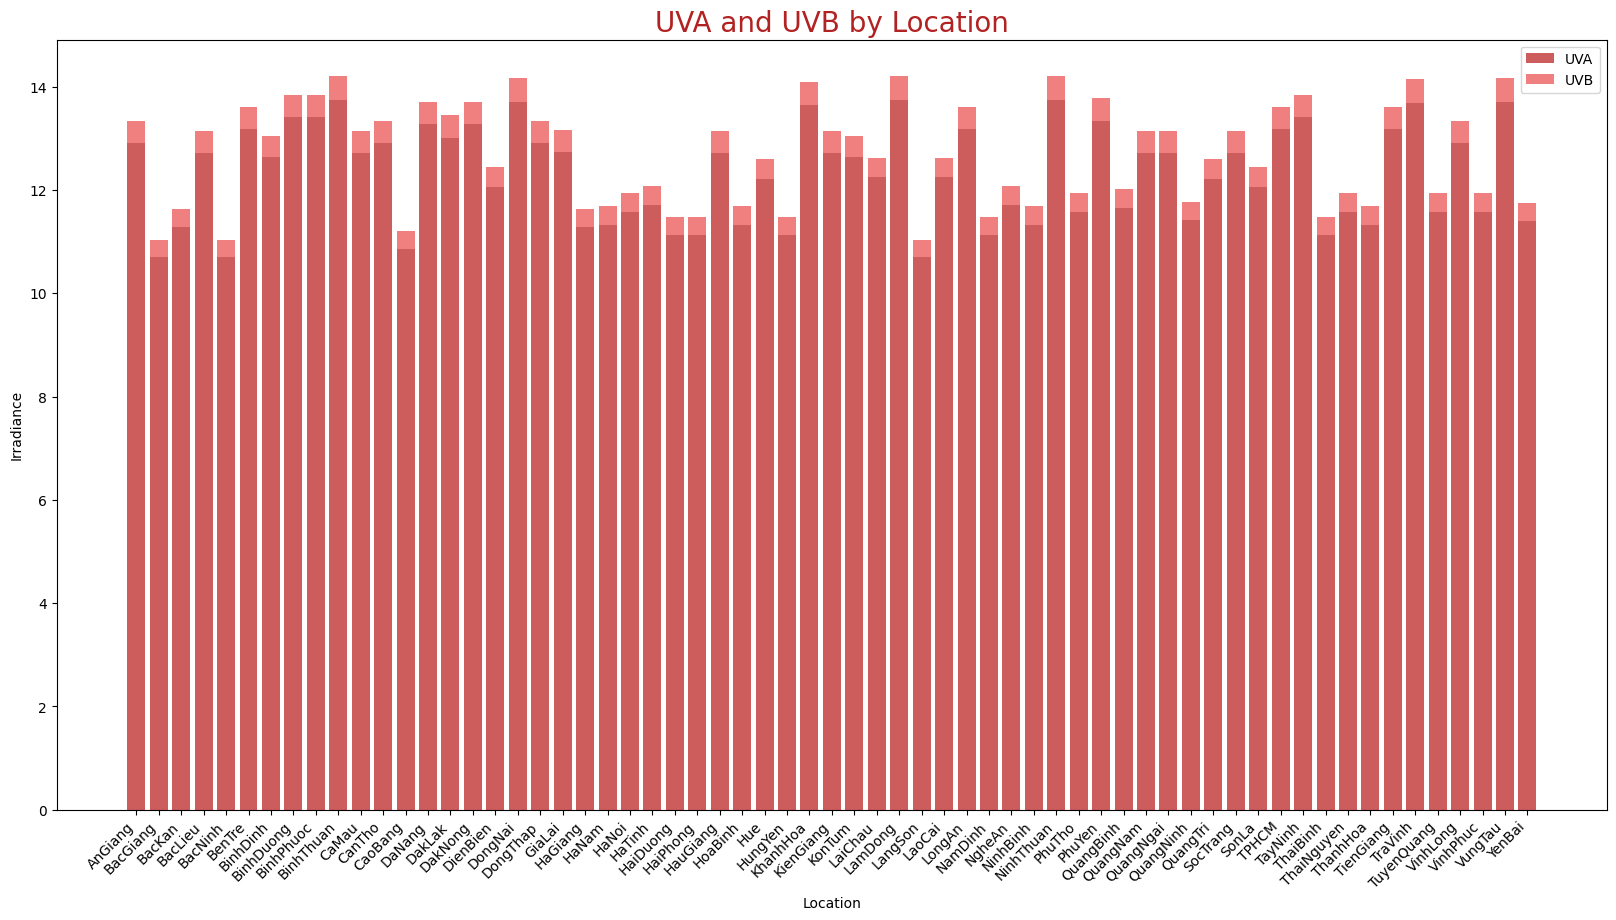

In [ ]:
uva = tmp.groupby('Location')['UVA'].mean().reset_index()
uvb = tmp.groupby('Location')['UVB'].mean().reset_index()

plt.figure(figsize=(20,10))
# Vẽ biểu đồ cột chồng
plt.bar(uva['Location'], uva['UVA'], label='UVA', color='indianred')
plt.bar(uvb['Location'], uvb['UVB'], bottom=uva['UVA'], label='UVB', color='lightcoral')

# Thiết lập các thông số khác của biểu đồ
plt.xlabel('Location')
plt.ylabel('Irradiance')
plt.title('UVA and UVB by Location', color='firebrick', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
mean_uvb_region = tmp.groupby('Region')['UVB'].mean().reset_index()
mean_uvidx_region = tmp.groupby('Region')['UVindx'].mean().reset_index()
mean_shwave_region = tmp.groupby('Region')['ShWave'].mean().reset_index()

In [ ]:
categories = ['UVB','UV Index','Short Wave']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[mean_uvb_region['UVB'][1],mean_uvidx_region['UVindx'][1],mean_shwave_region['ShWave'][1]],
      theta=categories,
      fill='toself',
      name='Dong_Nam_Bo',
))
fig.add_trace(go.Scatterpolar(
      r=[mean_uvb_region['UVB'][5],mean_uvidx_region['UVindx'][5],mean_shwave_region['ShWave'][5]],
      theta=categories,
      fill='toself',
      name='Trung_du_mien_nui_phia_Bac'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 6]
    )),
  showlegend=False
)

fig.show()


## **Some other related features**

In [ ]:
def draw_spider_plot(data, subject, name):
  df = pd.DataFrame(dict(
      r=data,
      theta= subject
      ))
  fig = px.line_polar(df, r='r', theta='theta', line_close=True, title='Some related features in ' + name)
  fig.update_traces(fill='toself')
  fig.update_layout(
      title_font=dict(size=25),  # Set font size to 25
      title_font_color="royalblue",   # Set font color to blue
      title_x=0.5,               # Center the title horizontally
      polar=dict(
          radialaxis=dict(
              visible=True,
              range=[0, 1]
    ))
      )
  fig.show()

In [ ]:
data_scale = tmp.loc[:,['Region','DewFrost','WBulbTemp2M','EarthSkin','SpecHumid2M','WSfSoil','Temp','SfPressure']]
feature_scale = ['DewFrost','WBulbTemp2M','EarthSkin','SpecHumid2M','WSfSoil','Temp','SfPressure']
for item in feature_scale:
  scaler = MinMaxScaler()
  data_scale[item] =scaler.fit_transform(data_scale.loc[:,[item]])

In [ ]:
mean_DewFrost_region = data_scale.groupby('Region')['DewFrost'].mean().reset_index()
mean_WBulbTemp2M_region = data_scale.groupby('Region')['WBulbTemp2M'].mean().reset_index()
mean_EarthSkin_region = data_scale.groupby('Region')['EarthSkin'].mean().reset_index()
# mean_SpecHumid2M_region = data_scale.groupby('Region')['SpecHumid2M'].mean().reset_index()
mean_WSfSoil_region = data_scale.groupby('Region')['WSfSoil'].mean().reset_index()
# mean_Temp_region = data_scale.groupby('Region')['Temp'].mean().reset_index()
mean_SfPressure_region = data_scale.groupby('Region')['SfPressure'].mean().reset_index()

data_merge = [mean_DewFrost_region, mean_WBulbTemp2M_region, mean_EarthSkin_region, mean_WSfSoil_region, mean_SfPressure_region]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Region', how='outer'), data_merge)

In [ ]:
for i in range(6):
  data = [merged_df['DewFrost'][i],merged_df['WBulbTemp2M'][i],merged_df['EarthSkin'][i],merged_df['WSfSoil'][i], merged_df['SfPressure'][i]]
  subject = ['Dew/Frost', 'Wet Bulb Temperature', 'Earth Skin Temperature', 'Surface Soil Wetness', 'Surface Pressure']
  name = merged_df['Region'][i]
  draw_spider_plot(data, subject, name)

## **Agriculture**

In [ ]:
lua = tmp[tmp['Agriculture'].apply(lambda x: 'lua' in x)]
ngo = tmp[tmp['Agriculture'].apply(lambda x: 'ngo' in x)]
khoai = tmp[tmp['Agriculture'].apply(lambda x: 'khoai' in x)]
san = tmp[tmp['Agriculture'].apply(lambda x: 'san' in x)]
che = tmp[tmp['Agriculture'].apply(lambda x: 'che' in x)]
mia = tmp[tmp['Agriculture'].apply(lambda x: 'mia' in x)]
cam = tmp[tmp['Agriculture'].apply(lambda x: 'cam' in x)]
lac = tmp[tmp['Agriculture'].apply(lambda x: 'lac' in x)]

tom = tmp[tmp['Agriculture'].apply(lambda x: 'tom' in x)]
ca = tmp[tmp['Agriculture'].apply(lambda x: 'ca' in x)]

trau = tmp[tmp['Agriculture'].apply(lambda x: 'trau' in x)]
bo = tmp[tmp['Agriculture'].apply(lambda x: 'bo' in x)]
heo = tmp[tmp['Agriculture'].apply(lambda x: 'heo' in x)]
giacam = tmp[tmp['Agriculture'].apply(lambda x: 'giacam' in x)]


In [ ]:
def explore_temp_agriculture(data, option, name):
  mean_agriculture_location = data.groupby(option)['Temp'].mean().reset_index().sort_values(by='Temp', ascending=False)
  plt.figure(figsize=(20, 10))
  palette = sns.color_palette('Oranges_r', n_colors=len(mean_temp_location))
  plt.bar(mean_agriculture_location[option], mean_agriculture_location['Temp'], color=palette)
  plt.xlabel('City')
  plt.ylabel('Average Temperature (°C)')
  plt.title(f'Average Temperature by {option} ({name})', color='darkorange', fontsize=20)
  plt.xticks(rotation=45, ha='right')
  plt.show()

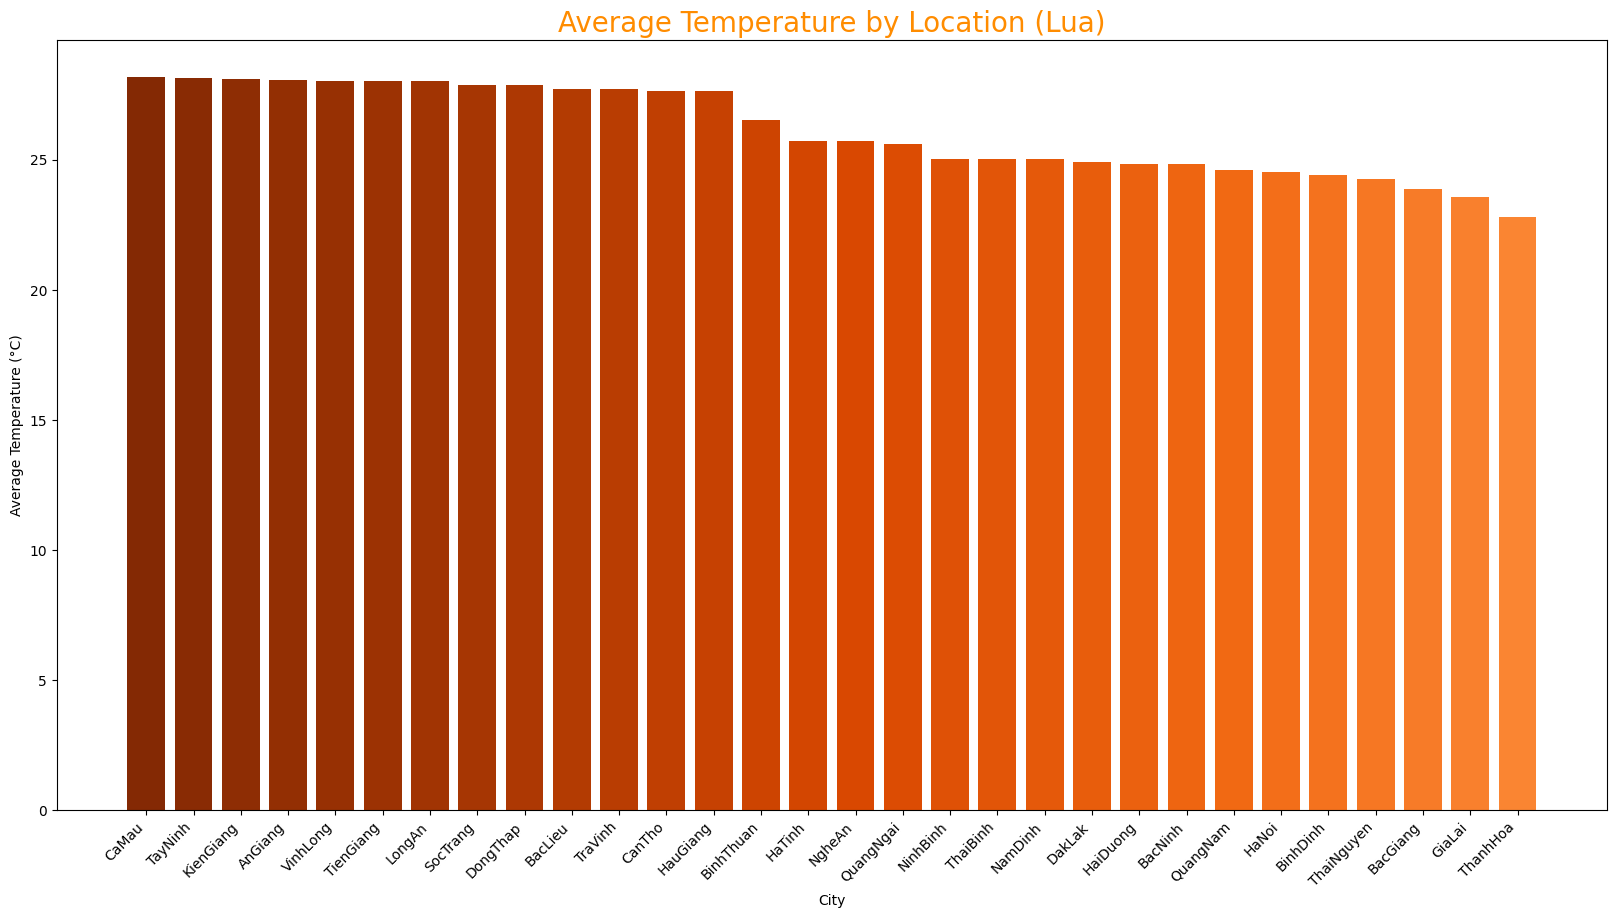

In [ ]:
explore_temp_agriculture(lua, 'Location', 'Lua')

In [ ]:
lua.groupby('Region')['Temp'].mean().reset_index().sort_values(by='Temp', ascending=False)

Region       Temp
1  Dong_Nam_Bo                           28.135988
2  Dong_bang_song_Cuu_Long               27.903940
0  Bac_Trung_Bo_va_Duyen_hai_mien_Trung  25.045736
3  Dong_bang_song_Hong                   24.870030
4  TayNguyen                             24.223997
5  Trung_du_mien_nui_phia_Bac            24.060254

In [ ]:
lua['Region'].value_counts()

Dong_bang_song_Cuu_Long                 4008
Bac_Trung_Bo_va_Duyen_hai_mien_Trung    2338
Dong_bang_song_Hong                     2004
Trung_du_mien_nui_phia_Bac              668 
TayNguyen                               668 
Dong_Nam_Bo                             334 
Name: Region, dtype: int64

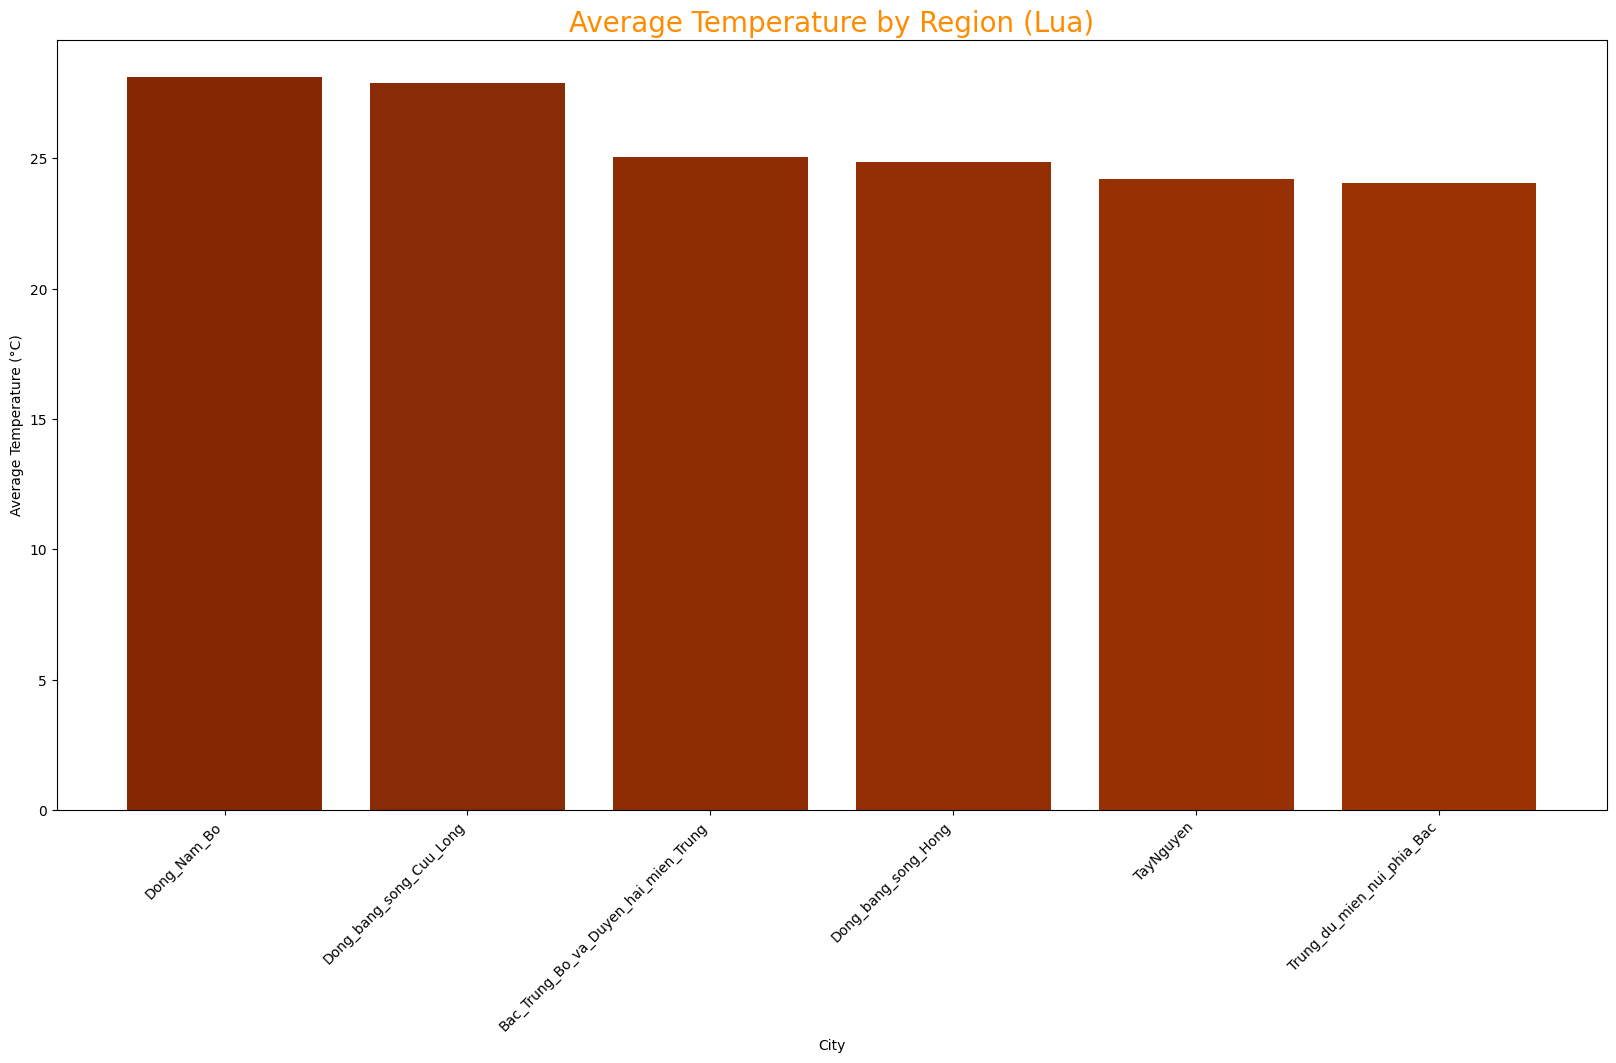

In [ ]:
explore_temp_agriculture(lua, 'Region', 'Lua')

## **Distribution and Central tendency**

### Numerical variance

In [ ]:
numeric = tmp.select_dtypes(exclude='object').columns
numeric

Index(['YEAR', 'Month', 'Day', 'ShWave', 'UVA', 'UVB', 'UVindx', 'Lon', 'Lat', 'Temp', 'DewFrost',
       'WBulbTemp2M', 'EarthSkin', 'SpecHumid2M', 'Precipitation', 'SfPressure', 'WiSpeed2M',
       'WiSpeed10M', 'WSfSoil'],
      dtype='object')

In [ ]:
# Function check symmetry of numerical varience
def check_symmetry(feature, percent):
  mean = feature.mean()
  median = feature.median()
  mode = feature.mode()
  if len(mode) == 1:
    if (abs(mean - median)/100 <= percent) and (abs(mode[0] - median)/100 <= percent):
      return True
  return False

def check_numerical_variance(df, cont_list):
  check = dict()
  for i in range(len(cont_list) - 3):
    check[cont_list[i]] = check_symmetry(df[cont_list[i]], 0.1)
  return check

In [ ]:
# Function plotting graphs before and after treating outliers of continous features
def dist_box_plot(data, col_list, title):
  for col in col_list:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()}' + title,weight='bold')
    fig.show()

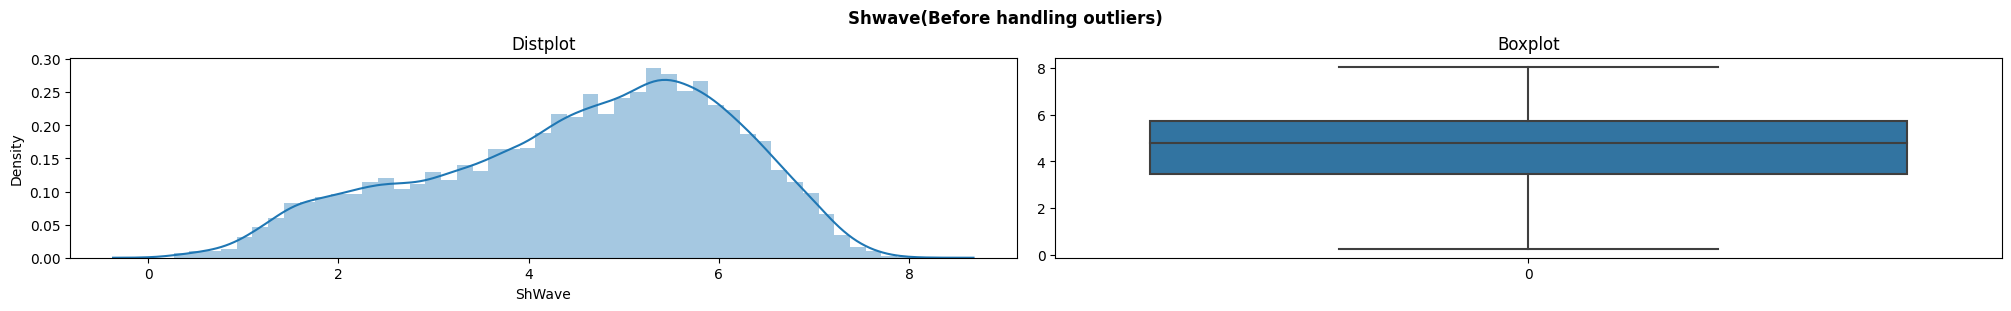

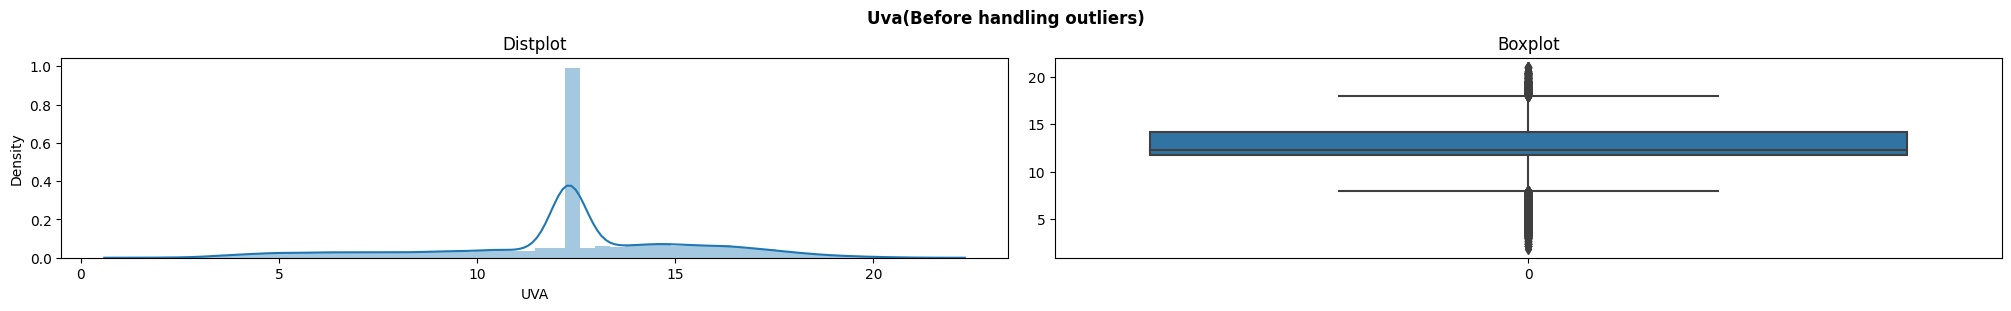

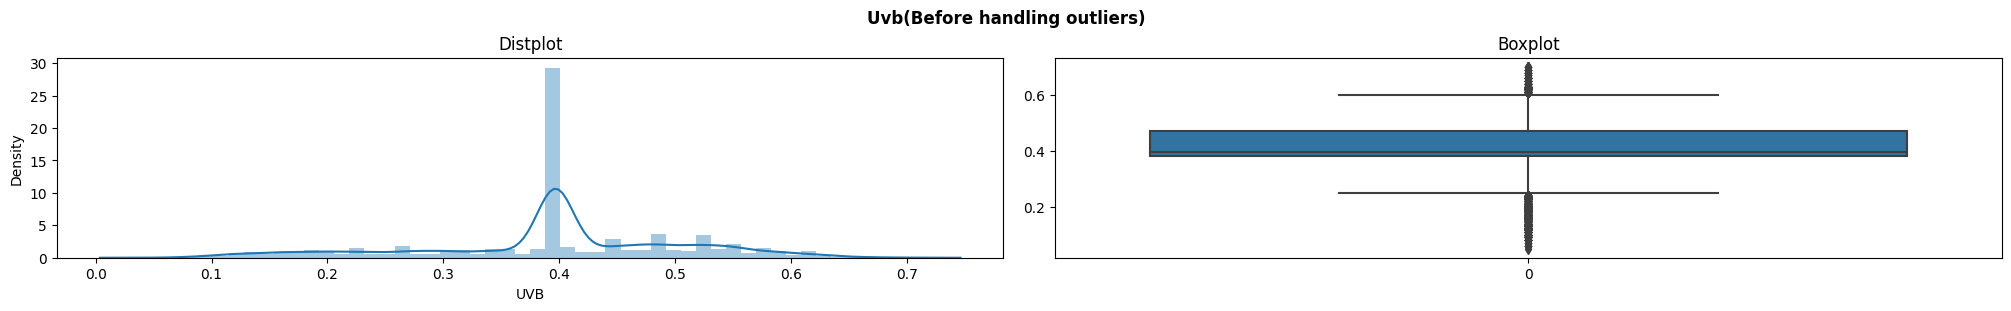

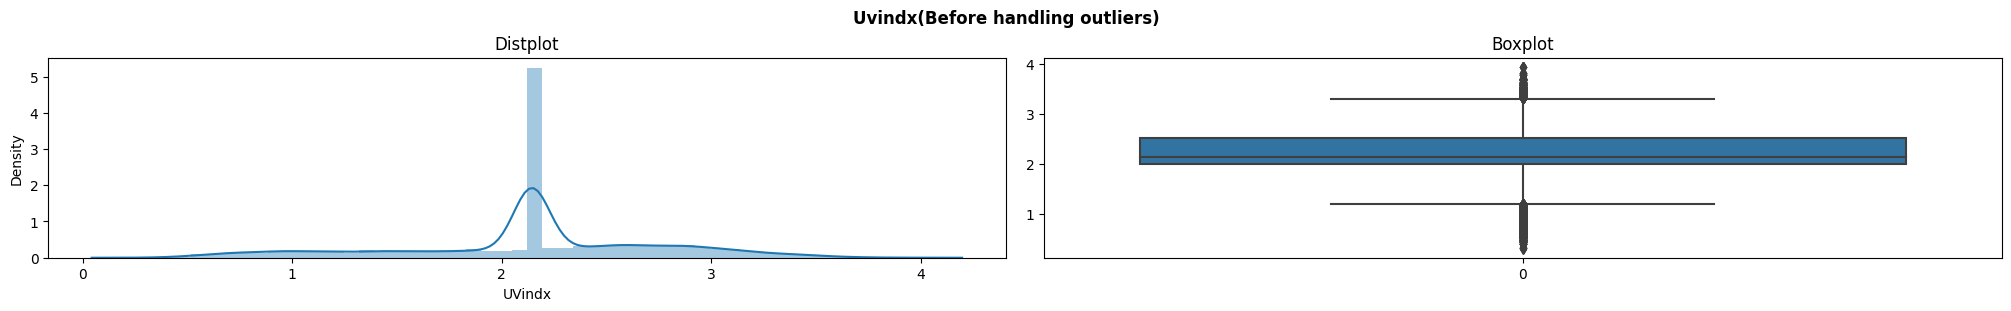

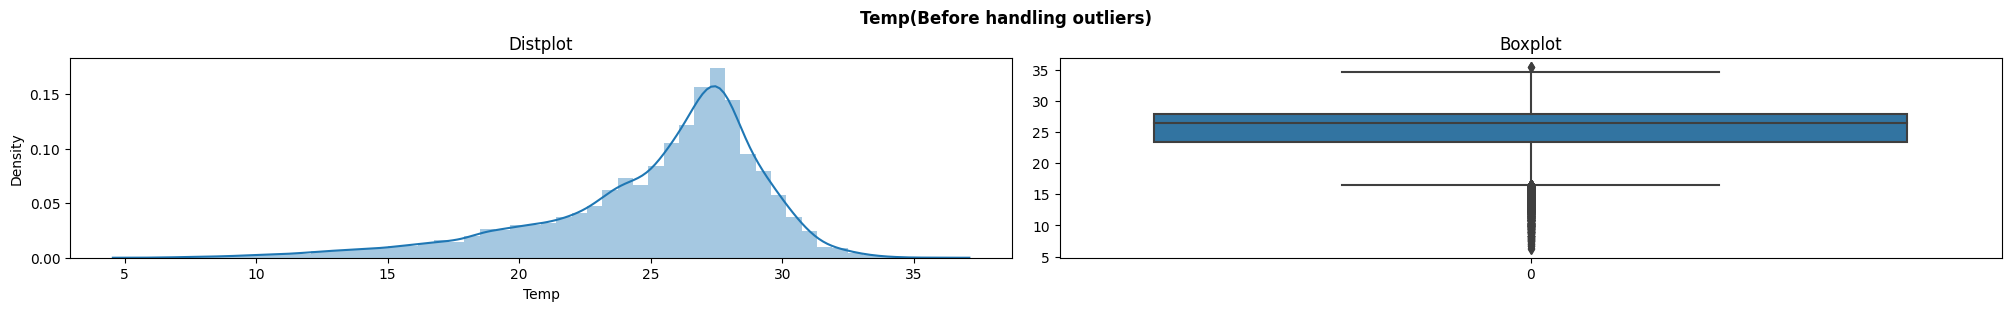

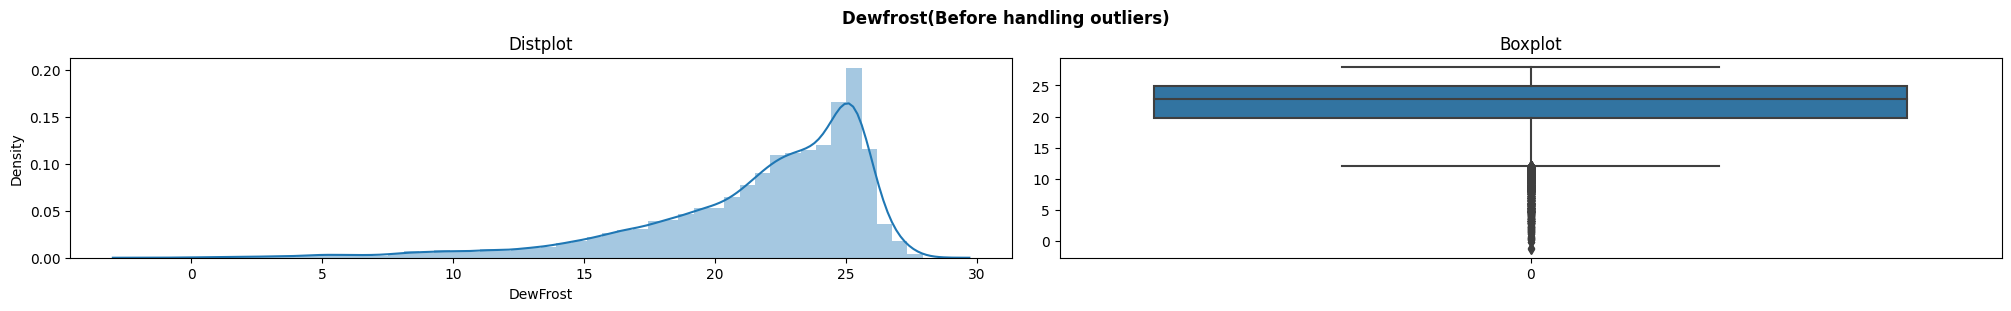

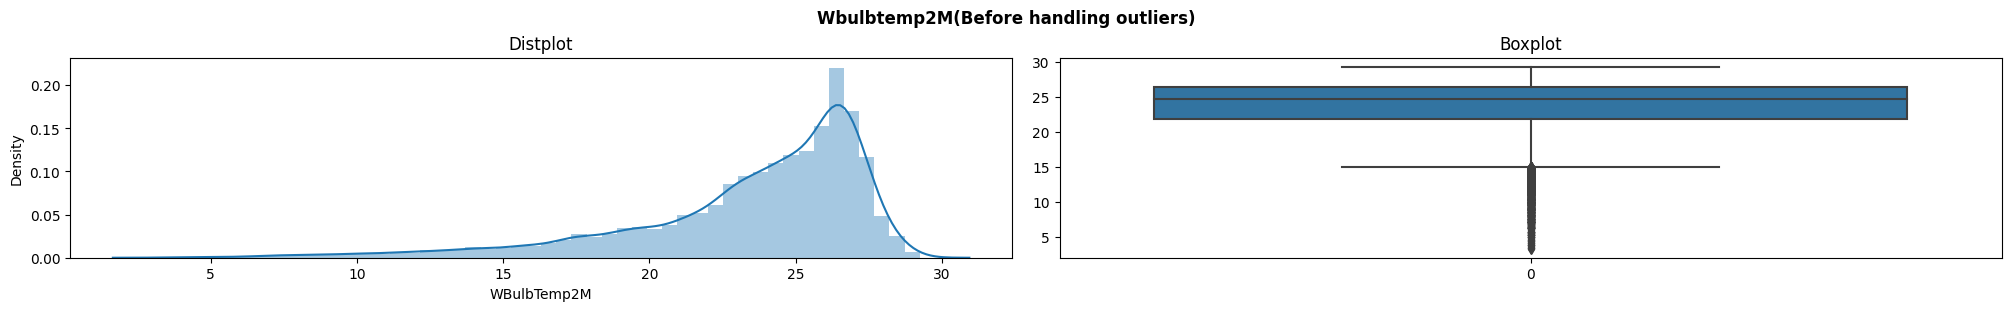

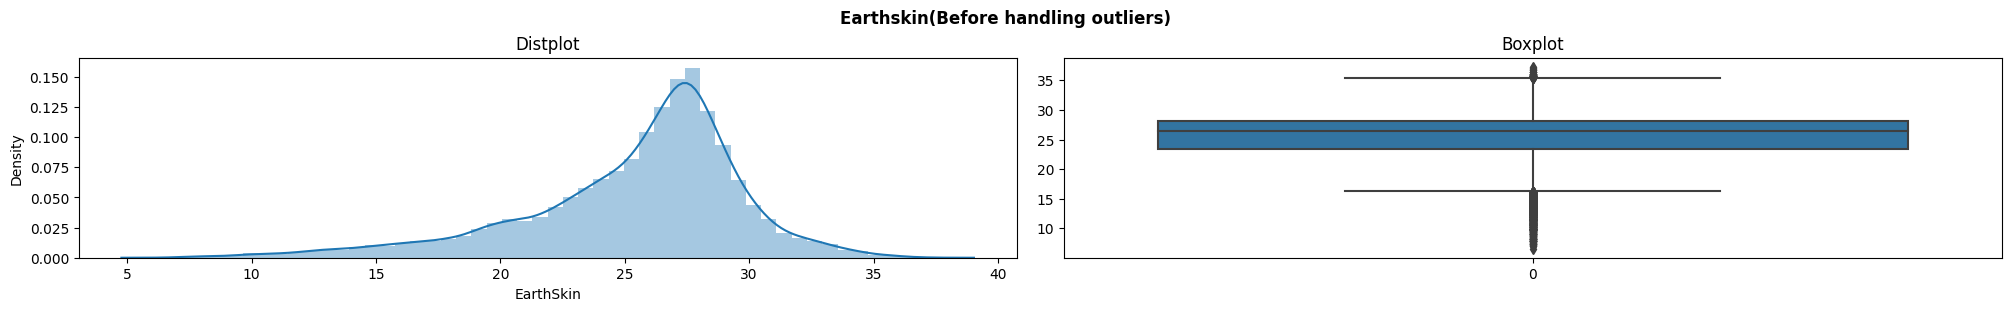

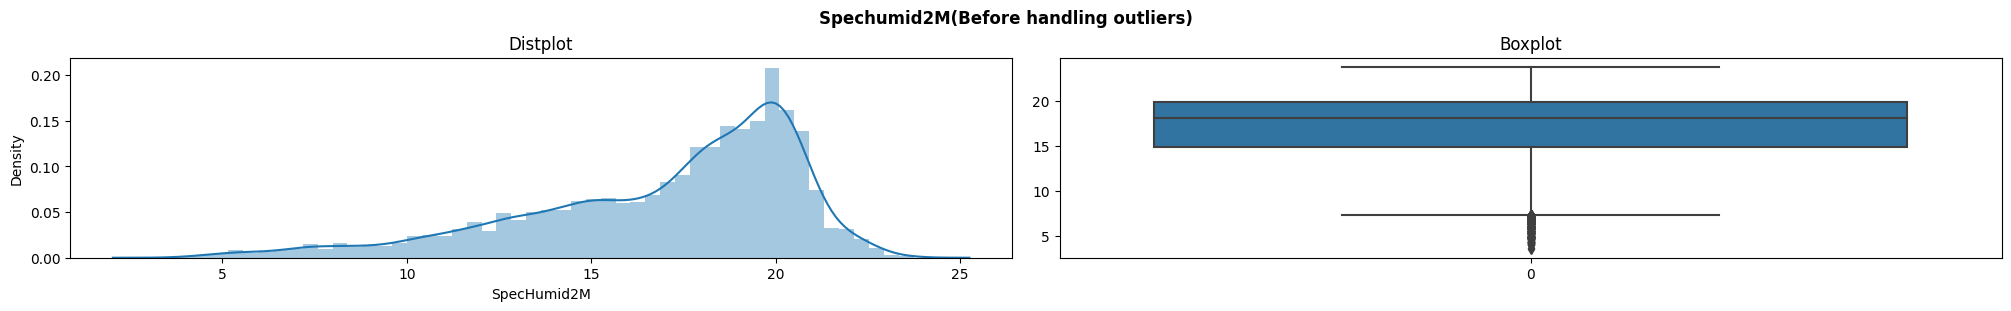

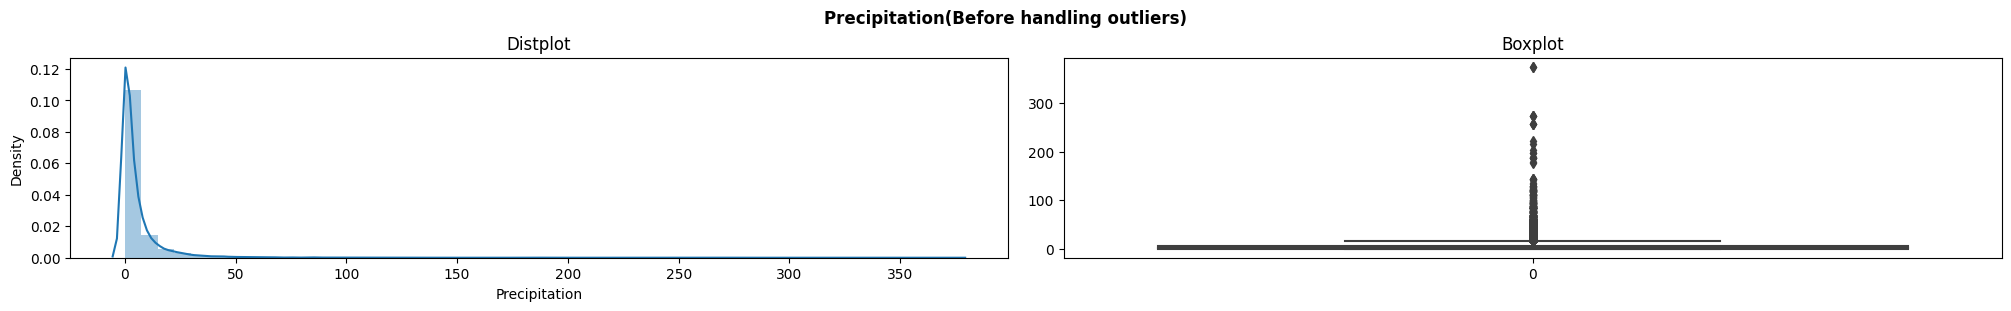

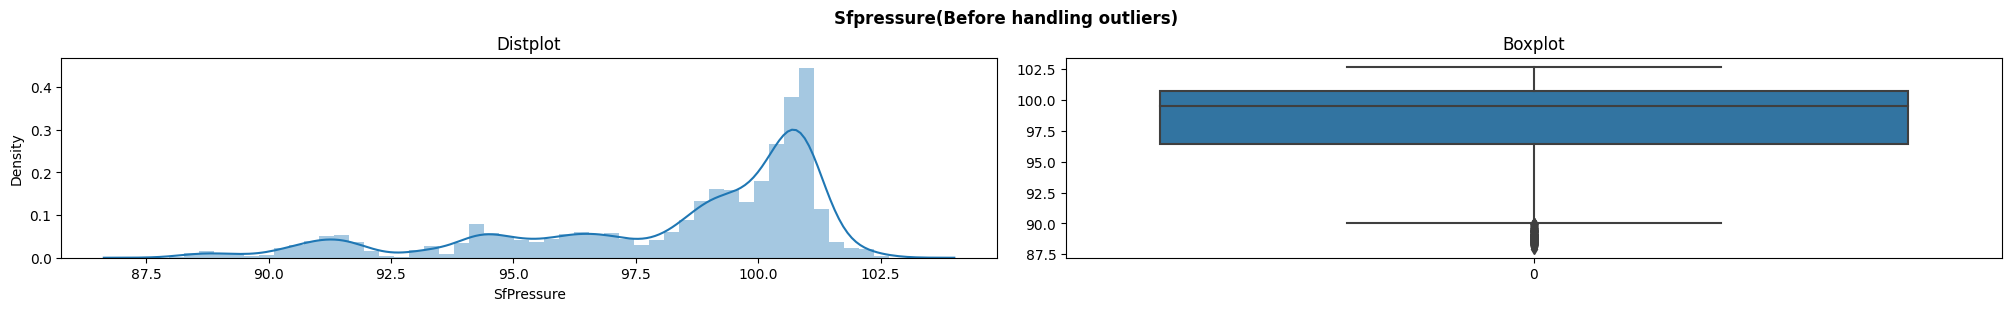

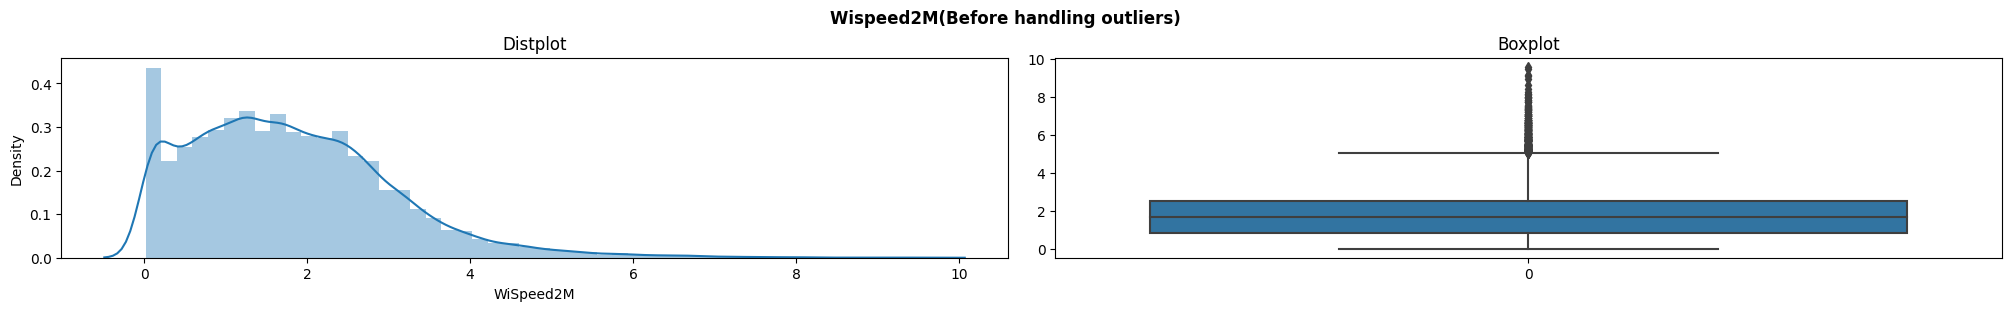

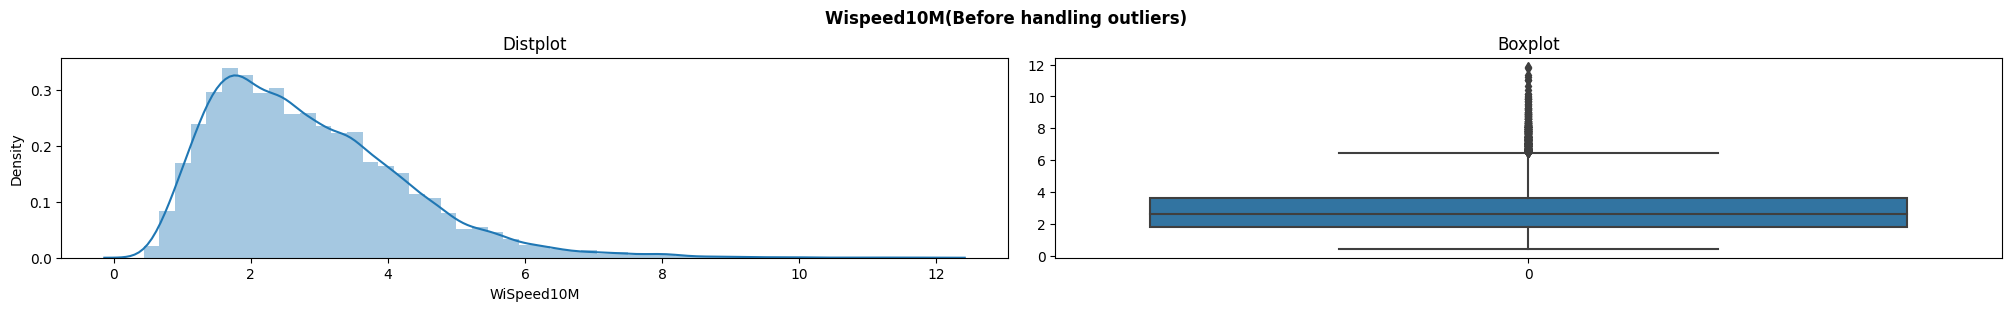

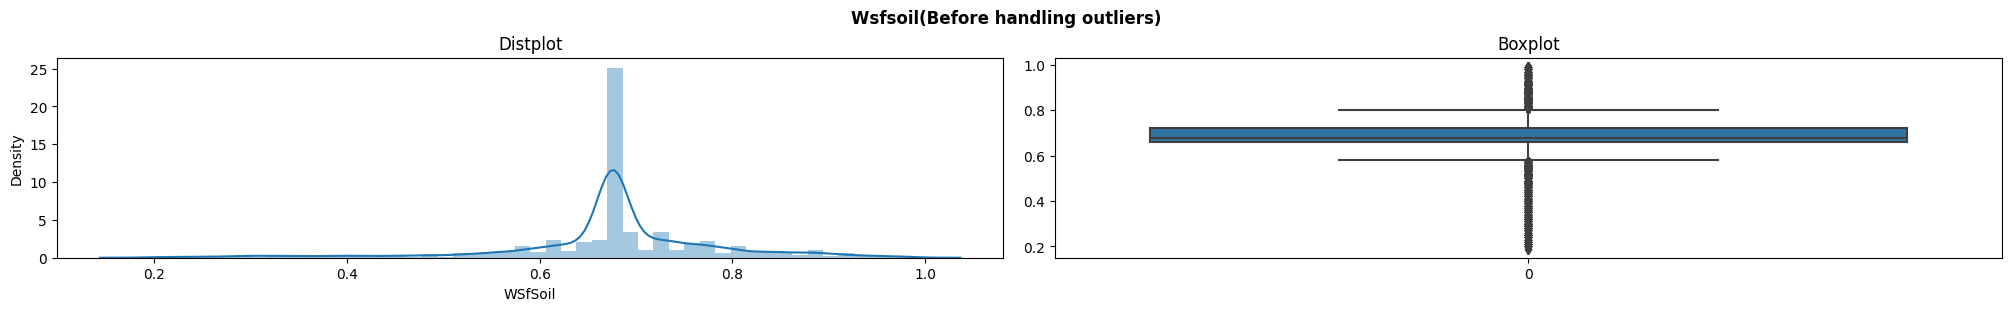

In [ ]:
# Lets define the continous columns
cont_col = ['ShWave', 'UVA', 'UVB', 'UVindx', 'Temp', 'DewFrost',
       'WBulbTemp2M', 'EarthSkin', 'SpecHumid2M', 'Precipitation', 'SfPressure', 'WiSpeed2M',
       'WiSpeed10M', 'WSfSoil']
#Plotting Graphs Before treating outliers of continous features
dist_box_plot(tmp, cont_col, '(Before handling outliers)')

In [ ]:
df_check_symmetry = pd.DataFrame(list(check_numerical_variance(tmp, cont_col).items()), columns=['Variance', 'Symmetry'])
df_check_symmetry

Variance  Symmetry
0   ShWave         True    
1   UVA            True    
2   UVB            True    
3   UVindx         True    
4   Temp           False   
5   DewFrost       True    
6   WBulbTemp2M    True    
7   EarthSkin      True    
8   SpecHumid2M    True    
9   Precipitation  True    
10  SfPressure     True

In [ ]:
# Function to get amount of outliers in numerical columns
def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Print total outlers and percentage using IQR method
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

# Lets get the amount of outliers in each numerical columns
outlier_prcnt(tmp, cont_col)

Total outliers in ShWave are: 0 - 0.0%.
Total outliers in UVA are: 3055 - 14.52%.
Total outliers in UVB are: 3061 - 14.55%.
Total outliers in UVindx are: 2750 - 13.07%.
Total outliers in Temp are: 1053 - 5.0%.
Total outliers in DewFrost are: 928 - 4.41%.
Total outliers in WBulbTemp2M are: 1130 - 5.37%.
Total outliers in EarthSkin are: 1043 - 4.96%.
Total outliers in SpecHumid2M are: 432 - 2.05%.
Total outliers in Precipitation are: 2034 - 9.67%.
Total outliers in SfPressure are: 351 - 1.67%.
Total outliers in WiSpeed2M are: 372 - 1.77%.
Total outliers in WiSpeed10M are: 395 - 1.88%.
Total outliers in WSfSoil are: 4247 - 20.18%.


In [ ]:
# Function to capping the outliers in numerical columns using IQR method
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(df[col_name]> fence_high, fence_high,
                                         np.where(df[col_name]< fence_low, fence_low,
                                                  df[col_name]))
    return df_new
# Lets get the amount of outliers in each numerical columns
tmp = outlier_handle(tmp, cont_col)

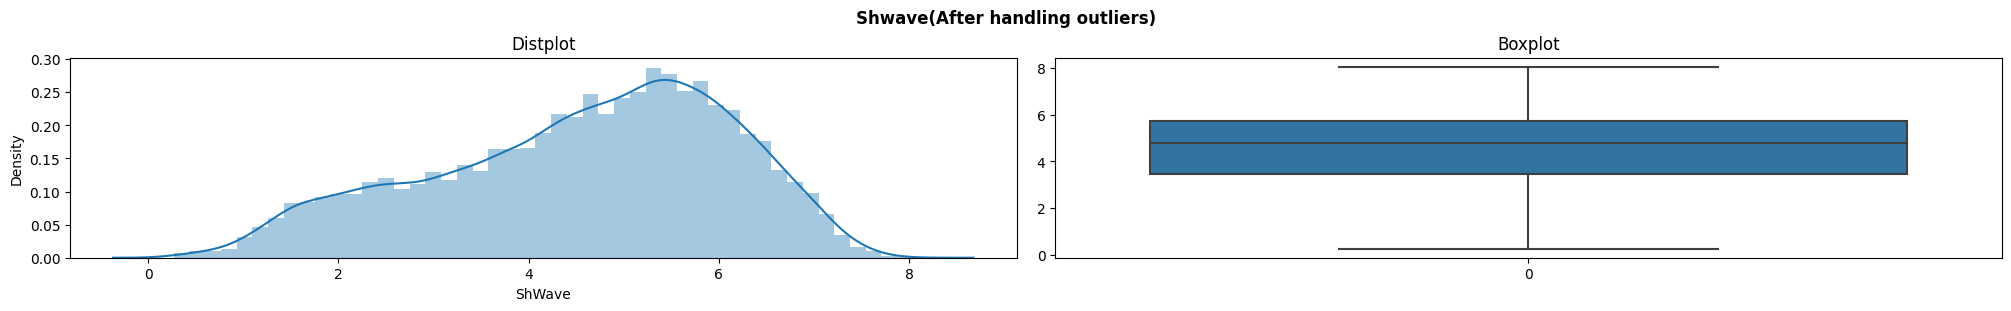

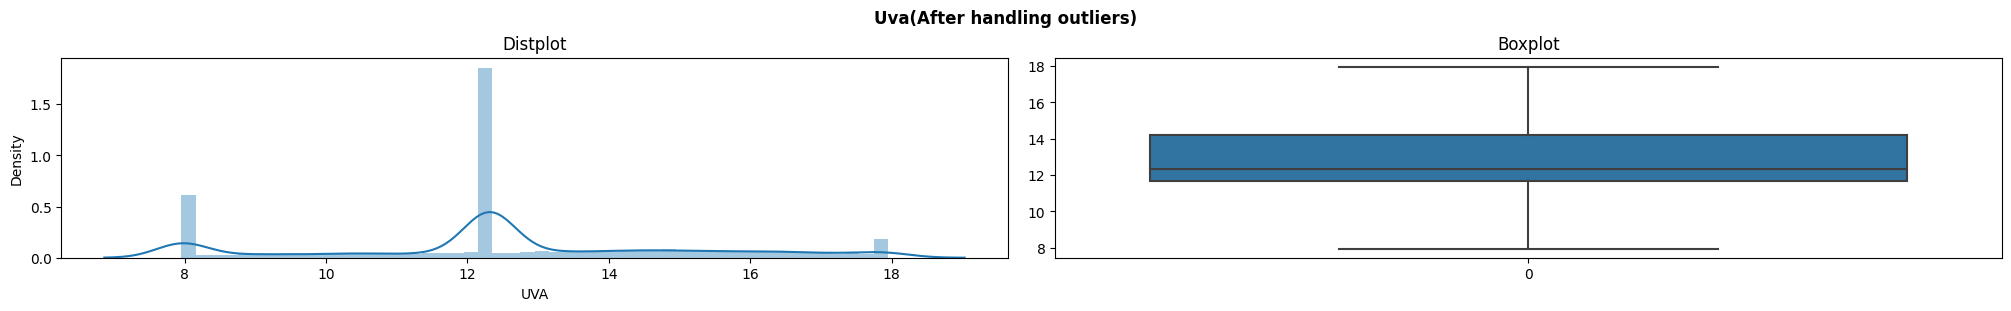

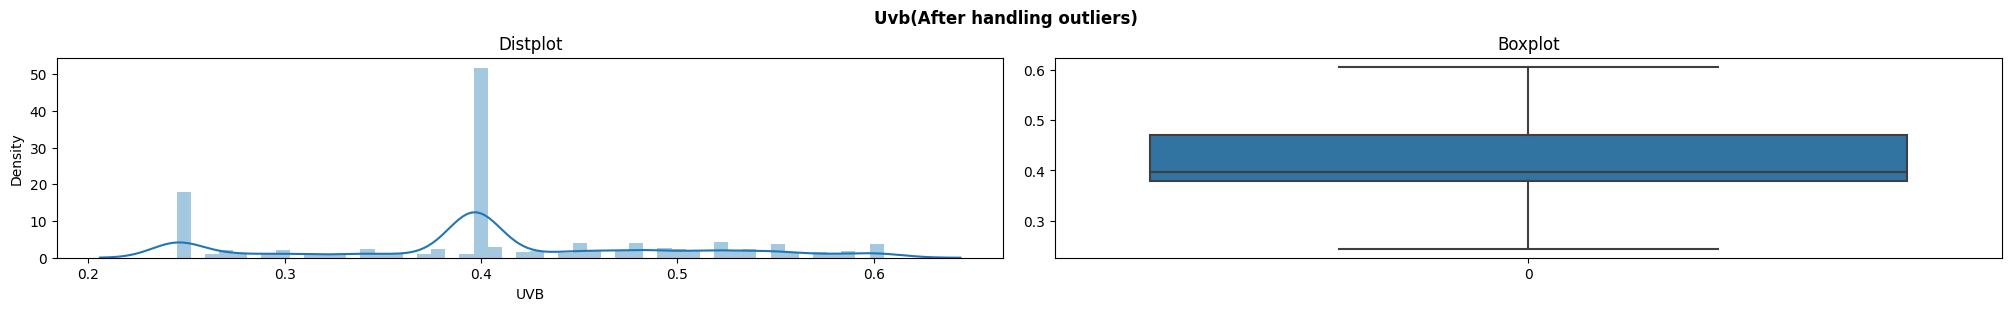

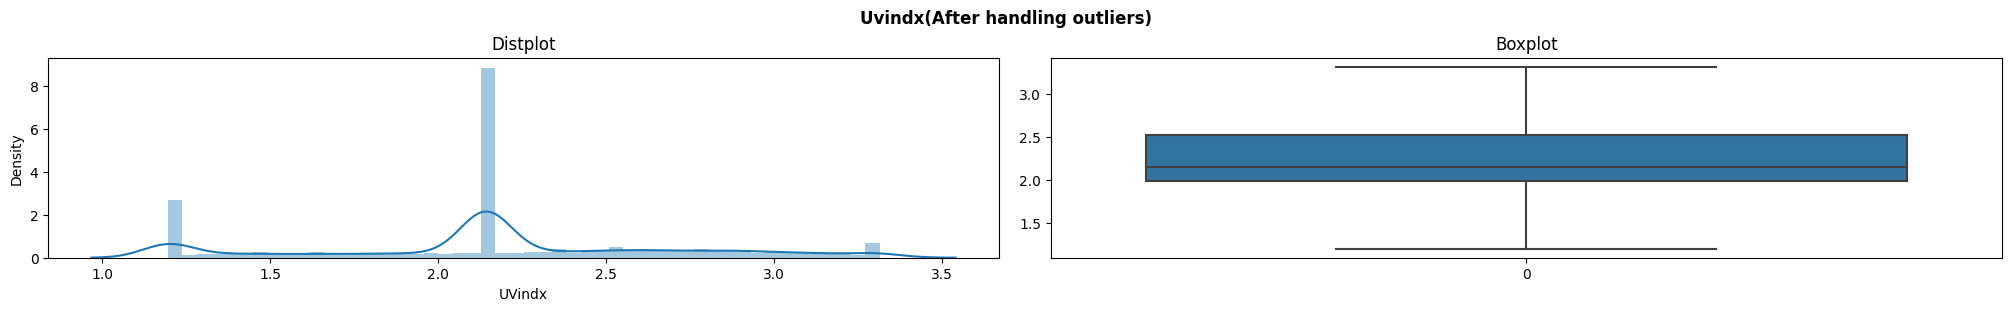

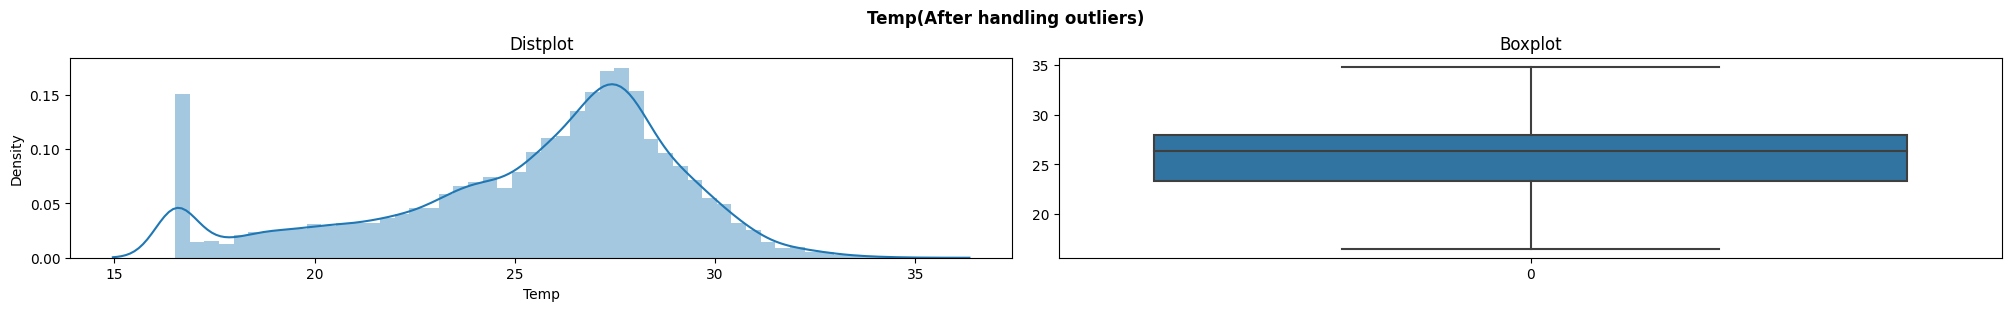

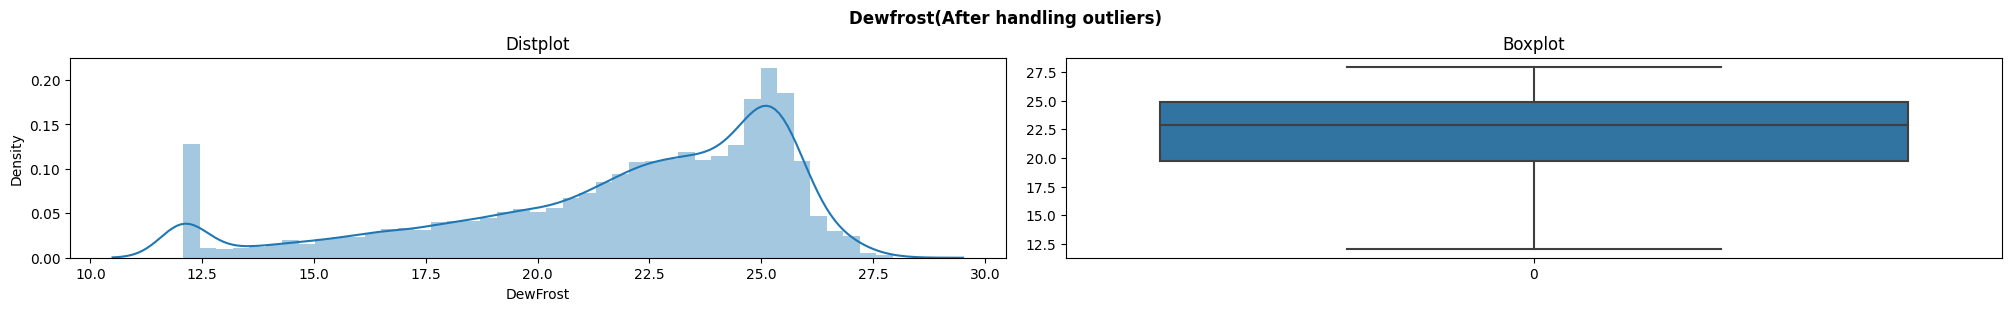

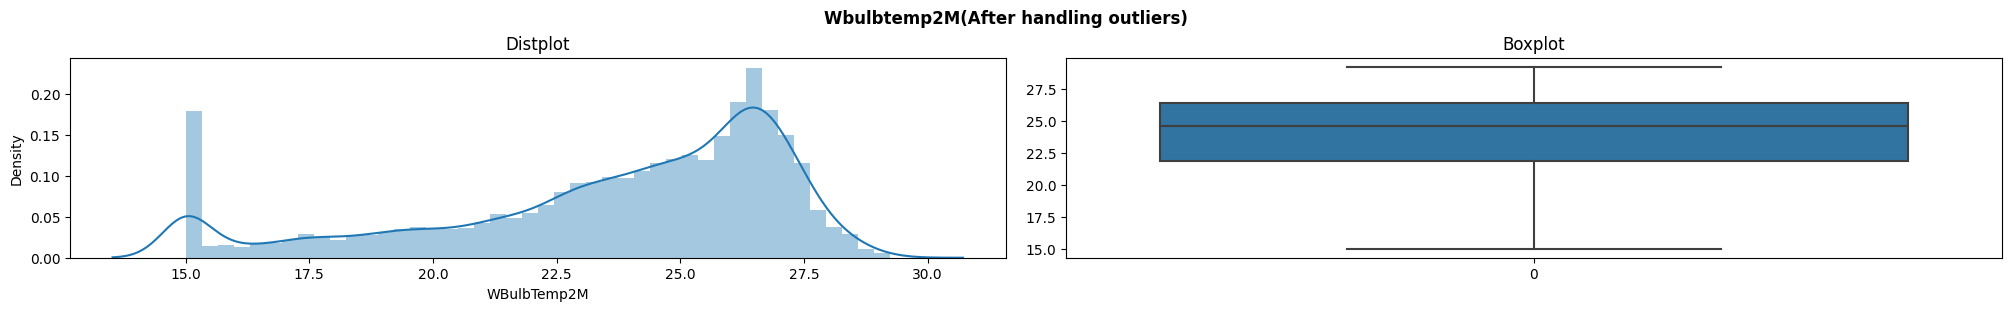

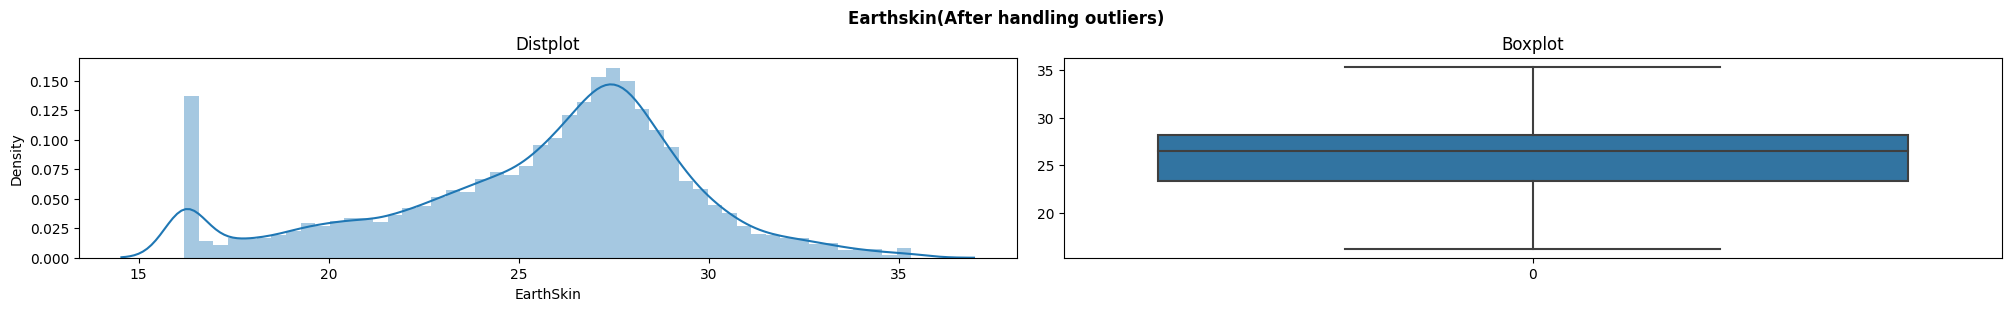

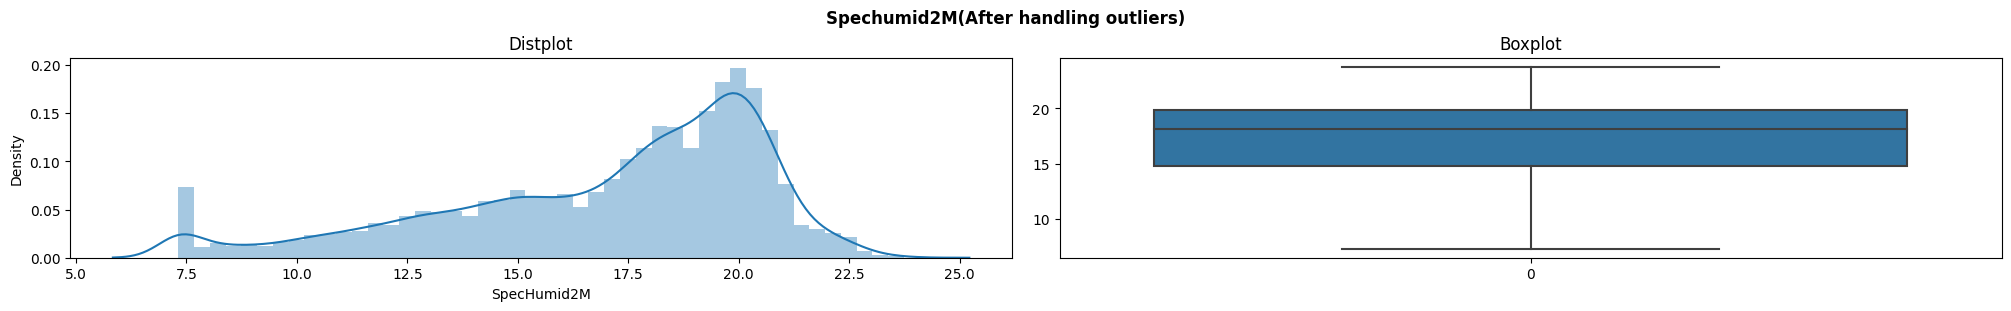

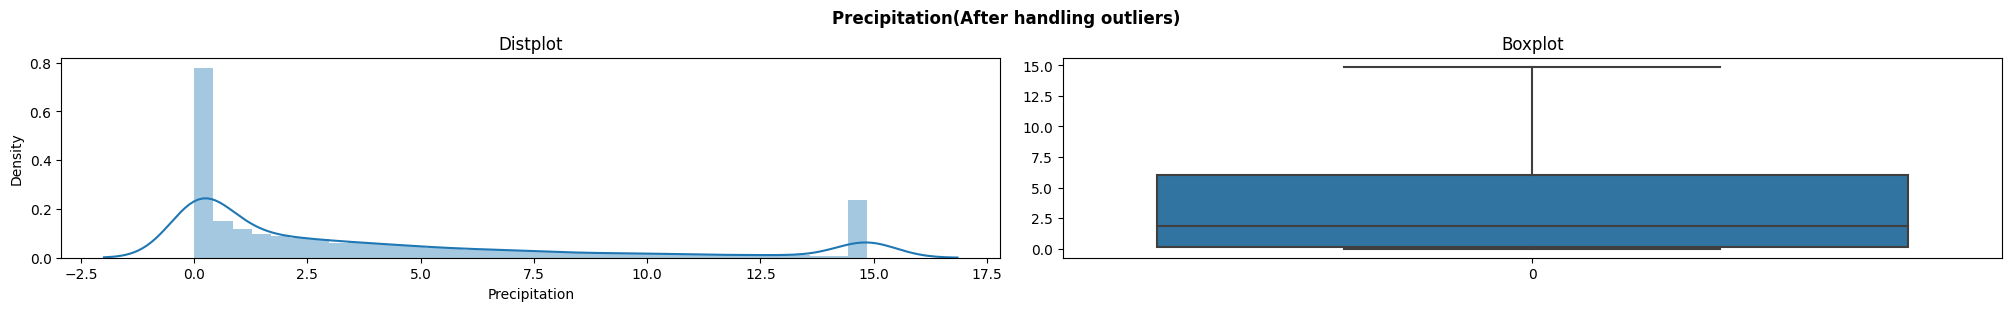

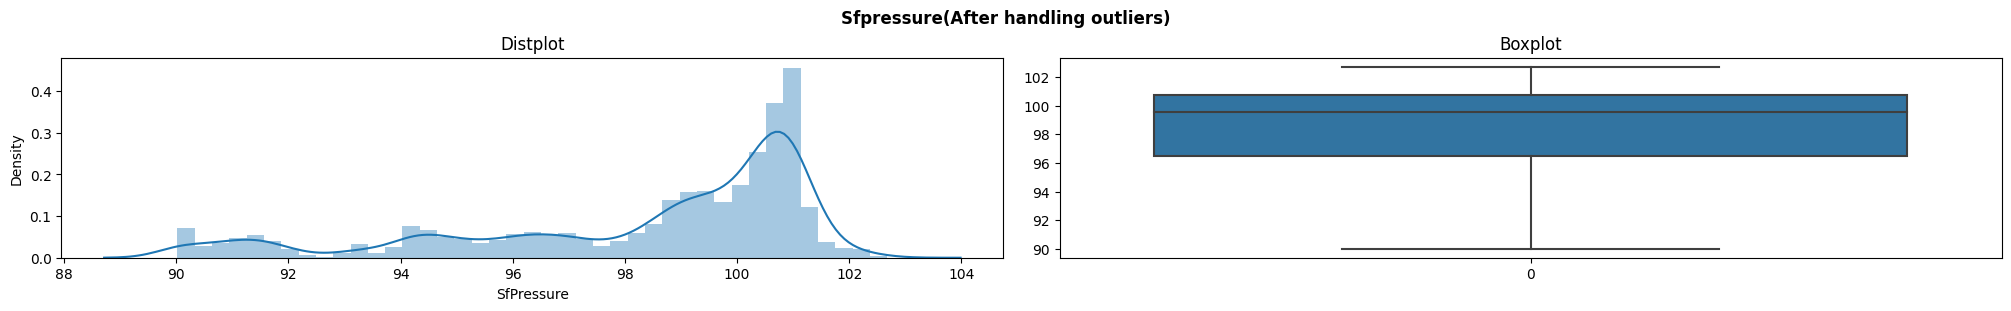

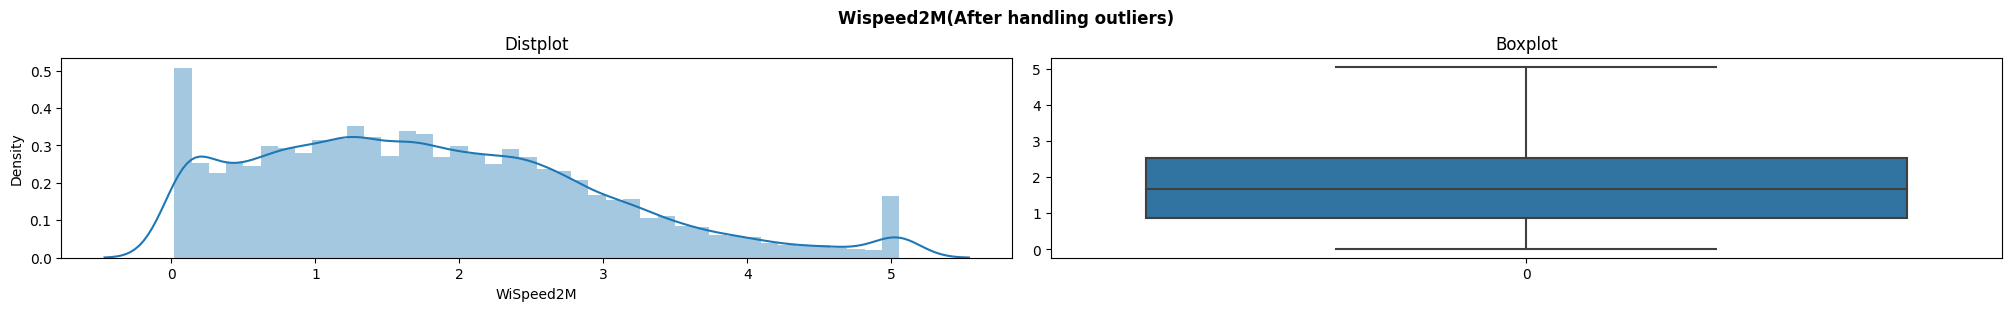

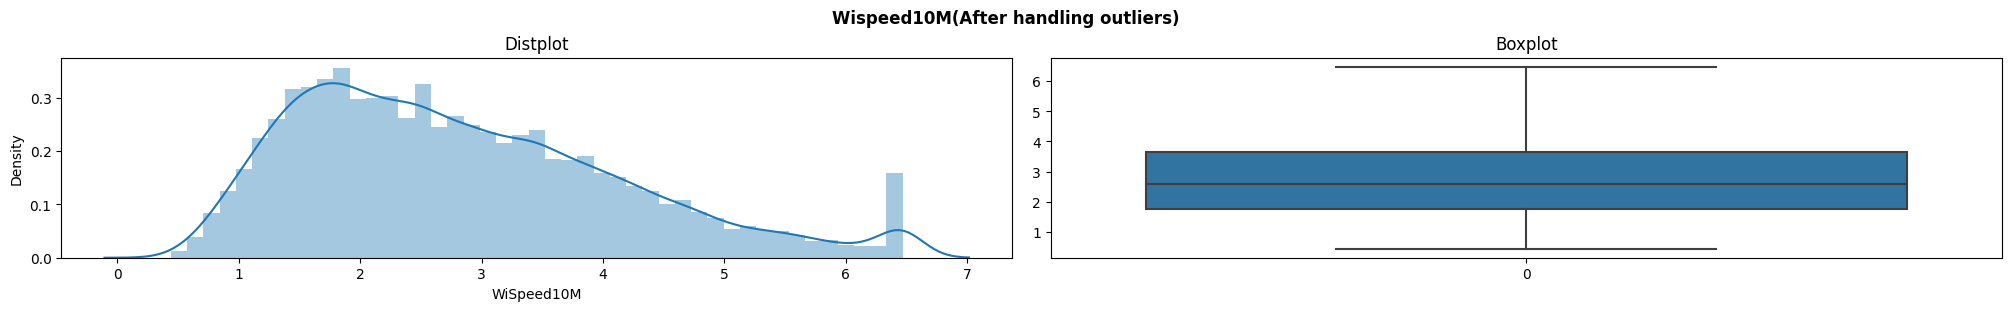

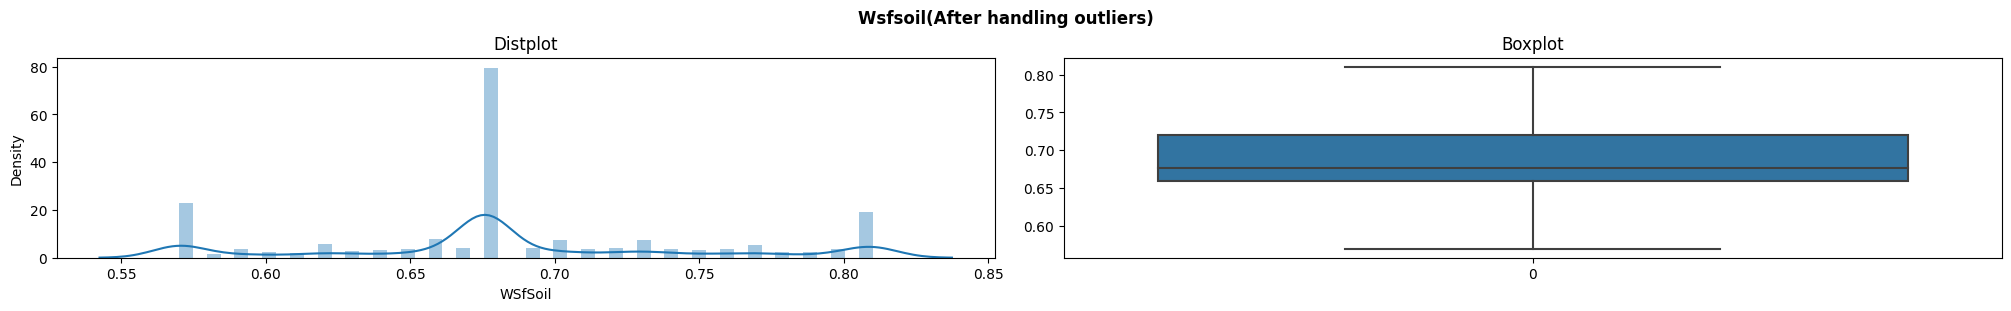

In [ ]:
#Plotting Graphs After treating outliers of continous features
dist_box_plot(tmp, cont_col, '(After handling outliers)')

### Correlation Heatmap

In [ ]:
def correlation_plot(df, numeric_columns, target_column=None):

    # Chọn các cột kiểu số từ DataFrame.
    numeric_df = df.loc[:, numeric_columns].copy()

    # Kiểm tra xem có cột giá được chỉ định hay không.
    if target_column is not None and target_column in df.columns:
        # Nếu có, thêm cột giá vào DataFrame.
        numeric_df[target_column] = df[target_column]

    # Tính ma trận tương quan.
    correlation_matrix = numeric_df.corr()

    # Tạo correlation plot bằng seaborn.
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0, linewidths=.5)
    plt.title('Correlation Plot of Numeric Variables')
    plt.show()

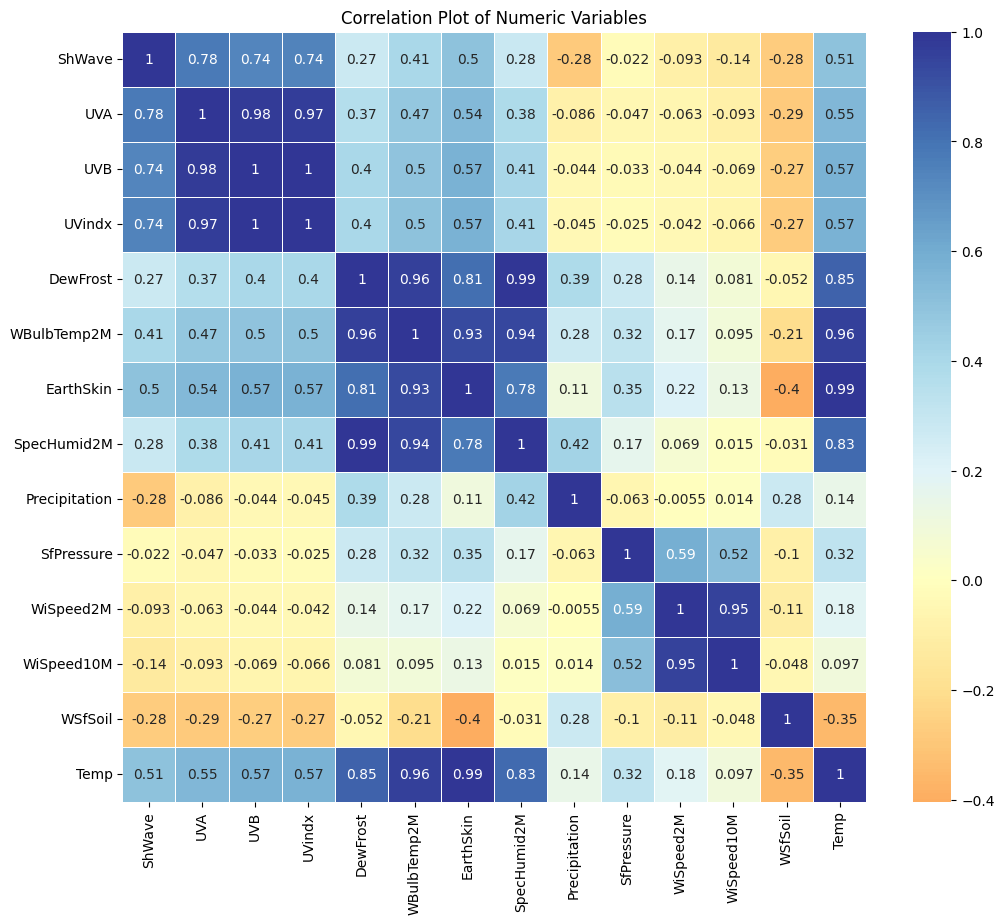

In [ ]:
# Vẽ biểu đồ tương quan giữa các biến số
numeric_cols = ['ShWave', 'UVA', 'UVB', 'UVindx', 'DewFrost',
       'WBulbTemp2M', 'EarthSkin', 'SpecHumid2M', 'Precipitation', 'SfPressure', 'WiSpeed2M',
       'WiSpeed10M', 'WSfSoil']
correlation_plot(tmp, numeric_cols, 'Temp')

**Check relation**

In [ ]:
def check_influence_level(series1: pd.Series, series2: pd.Series) -> int:

    correlation_coefficient, p_value = stats.pearsonr(series1, series2)

    if p_value < 0.05:
        if 0.3 < abs(correlation_coefficient) <= 0.5:
            return 3  # Weak
        elif 0.5 < abs(correlation_coefficient) <= 0.8:
            return 2  # median
        elif 0.8 < abs(correlation_coefficient) <= 1:
            return 1  # strong

    return 0  # no impact


def find_influential_variables(df: pd.DataFrame, target_col: str, variable_list: list = None) -> pd.DataFrame:

    if variable_list is None:
        variable_list = df.select_dtypes(include=['number']).columns.tolist()

    influence_dict = {'Variance': [], 'Influent Level': []}

    for col in variable_list:
        if col != target_col:
            influence_level = check_influence_level(df[col], df[target_col])
            influence_dict['Variance'].append(col)
            influence_dict['Influent Level'].append(influence_level)

    influence_df = pd.DataFrame(influence_dict)

    influence_df = influence_df.sort_values(by='Influent Level')

    return influence_df

In [ ]:
# Tìm tất cả các biến số có ảnh hưởng đến giá xe
find_influential_variables(tmp, 'Temp', numeric_cols)

Variance  Influent Level
8   Precipitation  0             
10  WiSpeed2M      0             
11  WiSpeed10M     0             
4   DewFrost       1             
5   WBulbTemp2M    1             
6   EarthSkin      1             
7   SpecHumid2M    1             
0   ShWave         2             
1   UVA            2             
2   UVB            2             
3   UVindx         2             
9   SfPressure     3             
12  WSfSoil        3

### Categorical variance

In [ ]:
categoric = tmp.select_dtypes(include='object').columns
categoric

Index(['Location', 'RelHumid2M', 'WiDirect2M', 'WiDirect10M', 'Region', 'Agriculture', 'DateTime'], dtype='object')

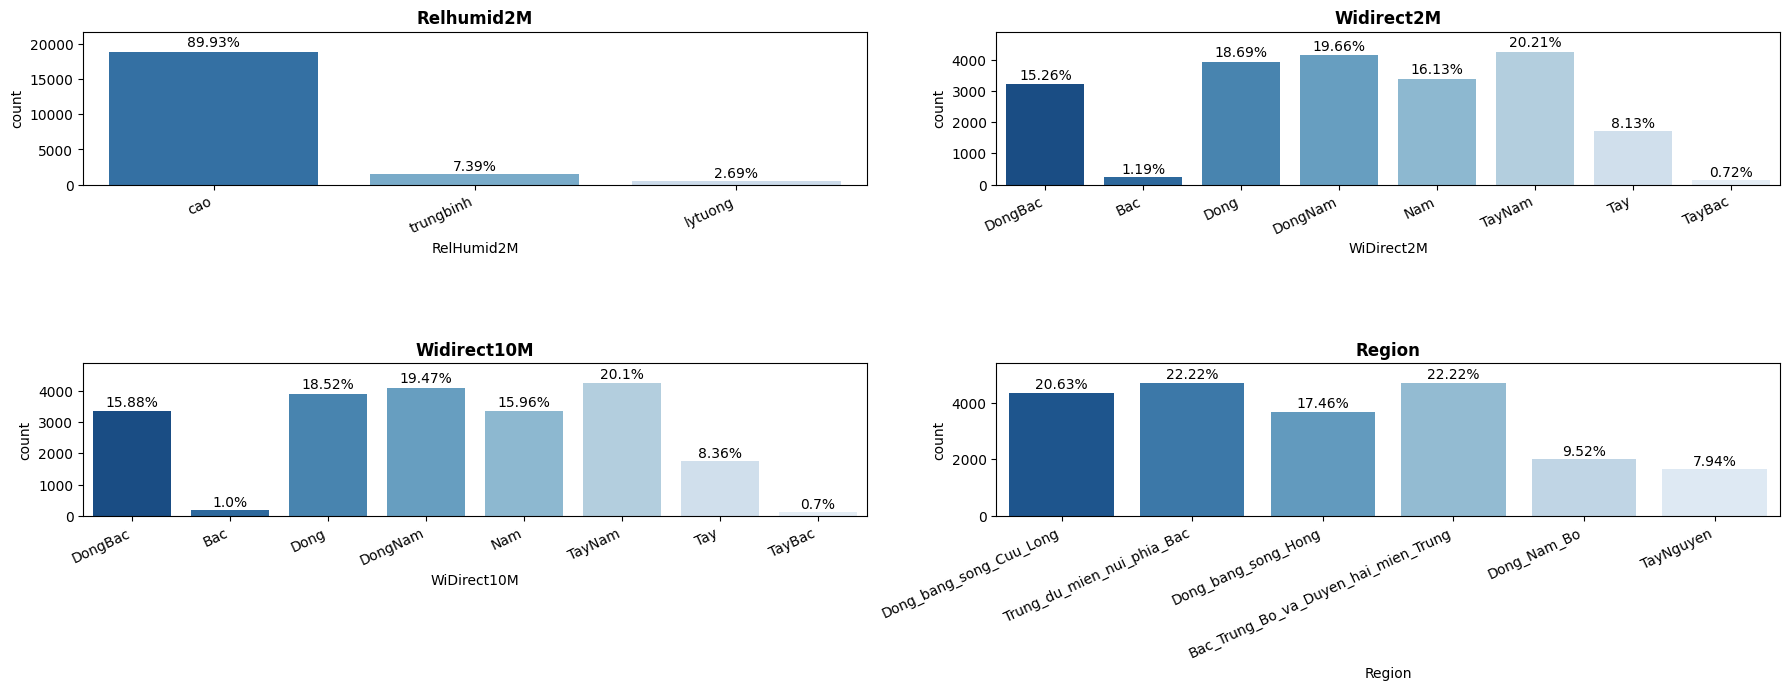

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

# Lets define the continous and categorical columns
cat_col  = ['RelHumid2M', 'WiDirect2M', 'WiDirect10M', 'Region']

# Plot the bar plot
r = int(len(categoric)/2 +1)    # Defining r to autofit the number and size of plots

# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(cat_col):
    plot = plt.subplot(r,2,n+1)
    sns.countplot(data=tmp, x=column, palette="Blues_r").margins(y=0.15)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

In [ ]:
def find_most_influential_categorical_variable(df, category_columns, target_column):

    results = []

    df_copy = df.copy()

    df_copy.columns = df_copy.columns.str.replace(' ', '_')

    for category_column in category_columns:
        formula = f"{target_column} ~ {category_column.replace(' ', '_')}"
        model = ols(formula, data=df_copy).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        f_statistic = anova_table['F'][0]
        p_value = anova_table['PR(>F)'][0]

        results.append({'Variance': category_column, 'F-statistic': f_statistic,
                       'p-value': p_value, 'Effect': True if p_value < 0.05 else False})

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(
        by=['F-statistic', 'p-value'], ascending=[False, True]).reset_index(drop=True)

    return result_df

In [ ]:
# Tạo dataframe chứa các giá trị đánh giá độ ảnh hưởng của các biến phân loại đến giá xe.
categorical_col = ['Location', 'RelHumid2M', 'WiDirect2M', 'WiDirect10M', 'Region']
find_most_influential_categorical_variable(tmp, categorical_col, 'Temp')

Variance  F-statistic        p-value  Effect
0  Region       1171.498705  0.000000e+00   True  
1  WiDirect10M  684.494838   0.000000e+00   True  
2  WiDirect2M   676.801890   0.000000e+00   True  
3  RelHumid2M   279.459928   1.645221e-120  True  
4  Location     127.583766   0.000000e+00   True

# Model

In [ ]:
data_linear = tmp.copy()

## **LSTM**

### Prepare data

In [ ]:
tmp.index = pd.to_datetime(tmp['DateTime'])

In [ ]:
tmp.drop('DateTime',axis=1,inplace=True)

<Axes: xlabel='DateTime'>

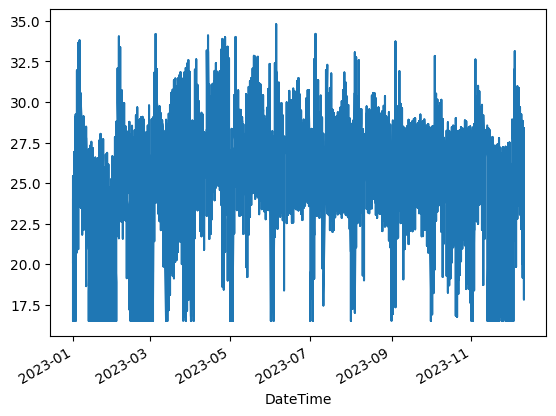

In [ ]:
temp = tmp['Temp']
temp.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((21037, 5, 1), (21037,))

In [ ]:
X_train1, y_train1 = X1[:15000], y1[:15000]
X_val1, y_val1 = X1[15000:17000], y1[15000:17000]
X_test1, y_test1 = X1[17000:], y1[17000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((15000, 5, 1), (15000,), (2000, 5, 1), (2000,), (4037, 5, 1), (4037,))

### Build model LSTM

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
469/469 [==============================] - 12s 20ms/step - loss: 432.7152 - root_mean_squared_error: 20.8018 - val_loss: 200.5932 - val_root_mean_squared_error: 14.1631
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 78.3773 - root_mean_squared_error: 8.8531 - val_loss: 15.3814 - val_root_mean_squared_error: 3.9219
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 15.2269 - root_mean_squared_error: 3.9022 - val_loss: 11.2975 - val_root_mean_squared_error: 3.3612
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 9.4980 - root_mean_squared_error: 3.0819 - val_loss: 5.1969 - val_root_mean_squared_error: 2.2797
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 3.8272 - root_mean_squared_error: 1.9563 - val_loss: 1.7297 - val_root_mean_squared_error: 1.3152
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 2.0471 - root_mean_squared_error: 1.4308 - val_

In [ ]:
model1 = load_model('model')

### Evaluate

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results.head()

469/469 [==============================] - 2s 3ms/step


Train Predictions  Actuals
0  24.555704          24.28  
1  24.395506          23.29  
2  23.485210          24.21  
3  24.210730          25.68  
4  25.552217          25.52

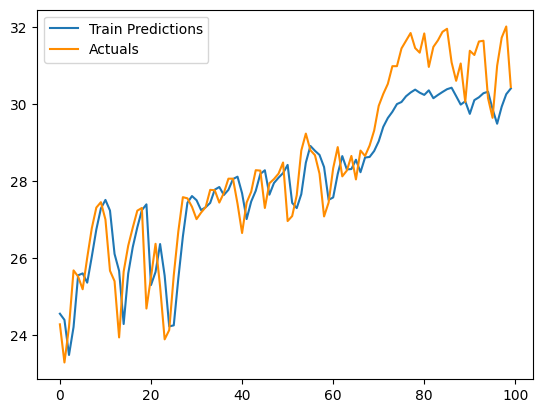

In [ ]:
plt.plot(train_results['Train Predictions'][:100], label='Train Predictions')
plt.plot(train_results['Actuals'][:100], label='Actuals', color='darkorange')
plt.legend()
plt.show()

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results.head()

63/63 [==============================] - 0s 3ms/step


Val Predictions  Actuals
0  24.877369        24.37  
1  24.518692        24.58  
2  24.667521        24.80  
3  24.870340        24.87  
4  24.959307        24.98

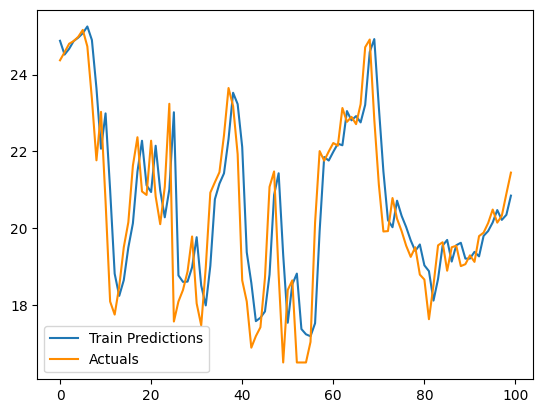

In [ ]:
plt.plot(val_results['Val Predictions'][:100], label='Train Predictions')
plt.plot(val_results['Actuals'][:100], label='Actuals', color='darkorange')
plt.legend()
plt.show()

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results.head()

127/127 [==============================] - 0s 3ms/step


Test Predictions  Actuals
0  20.139008         21.54  
1  21.394901         22.85  
2  22.704037         23.48  
3  23.408855         24.05  
4  24.013403         22.36

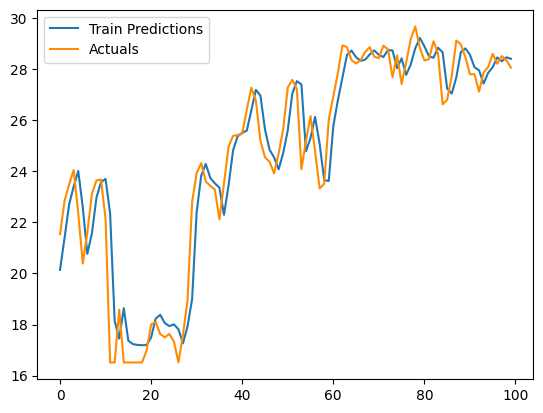

In [ ]:
plt.plot(test_results['Test Predictions'][:100], label='Train Predictions')
plt.plot(test_results['Actuals'][:100], label='Actuals', color='darkorange')
plt.legend()
plt.show()

In [ ]:
def evaluateModel(test,pred,val,pred_val):

  # Evaluate test
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_mse = mean_squared_error(test, pred)
  print('MSE: ', test_mse)


  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  test_r2 = r2_score(test, pred)
  print('R2: ', test_r2)

  # Evaluate validation
  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_mse = mean_squared_error(val, pred_val)
  print('MSE: ', val_mse)


  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

  val_r2 = r2_score(val, pred_val)
  print('R2: ', val_r2)

In [ ]:
evaluateModel(y_test1,test_predictions,y_val1,val_predictions)

** Testing **
MAE:  0.7720402015646347
MSE:  1.4174516851652617
RMSE:  1.1905677994827768
R2:  0.9031759894927968

** Validate **
MAE:  0.6718244982910155
MSE:  1.023842943299264
RMSE:  1.0118512456380453
R2:  0.918746123873734


**Predict next 30days**

In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = X_test1[len(X_test1) - 10:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 50)
[18.11, 18.67, 18.36, 19.11, 18.39, 18.67, 18.36, 19.11, 18.39, 18.33, 18.36, 19.11, 18.39, 18.33, 19.69, 19.11, 18.39, 18.33, 19.69, 21.12, 18.39, 18.33, 19.69, 21.12, 20.91, 18.33, 19.69, 21.12, 20.91, 21.05, 19.69, 21.12, 20.91, 21.05, 21.63, 21.12, 20.91, 21.05, 21.63, 21.75, 20.91, 21.05, 21.63, 21.75, 20.35, 21.05, 21.63, 21.75, 20.35, 20.15]


In [ ]:
# Initialize variables
lst_output = []
n_steps = 49
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 49):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model1.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model1.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[20.058732986450195], [20.018049240112305], [19.983991622924805], [19.937116622924805], [19.883052825927734], [19.826635360717773], [19.770612716674805], [19.716419219970703], [19.66480255126953], [19.61614418029785], [19.57061767578125], [19.528278350830078], [19.48910140991211], [19.4530086517334], [19.419870376586914], [19.389541625976562], [19.361865997314453], [19.33667755126953], [19.31378936767578], [19.293012619018555], [19.274202346801758], [19.257190704345703], [19.24181365966797], [19.227924346923828], [19.21537971496582], [19.204072952270508], [19.193883895874023], [19.184696197509766], [19.17641830444336], [19.168956756591797]]


## **LinearRegression**

### Prepare data

In [ ]:
categorical_columns = ['Location', 'RelHumid2M', 'WiDirect2M', 'WiDirect10M', 'Region']

In [ ]:
df_onehot = data_linear.copy()
df_onehot.drop(['DateTime','Agriculture','YEAR','Month','Day'],axis=1, inplace=True)

df_onehot = pd.get_dummies(df_onehot, prefix=categorical_columns)
temperature = df_onehot.pop('Temp')
df_onehot['Temp'] = temperature

In [ ]:
def split_data(df, target_col, test_size=0.2, random_state=None):
  X = df.drop(columns=[target_col])
  y = df[target_col]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  train_df = pd.concat([X_train, y_train], axis=1)
  test_df = pd.concat([X_test, y_test], axis=1)

  return (train_df, test_df)

In [ ]:
train_df, test_df = split_data(df_onehot, 'Temp', test_size=0.2, random_state=42)

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)
print()

Train DataFrame shape: (16833, 104)
Test DataFrame shape: (4209, 104)



### Build model LinearRegression with Pipeline

In [ ]:
pipelines = {
    'multi_stscale': [('scale', MinMaxScaler()),
                    ('model', LinearRegression())]
}

In [ ]:
results = []

for name, pipeline in pipelines.items():

  model = Pipeline(pipeline).fit(train_df.iloc[:,:-1], train_df['Temp'])

  y_pred = model.predict(test_df.iloc[:,:-1])
  r2 = r2_score(test_df['Temp'], y_pred)
  mse = mean_squared_error(test_df['Temp'], y_pred)
  rmse = np.sqrt(mean_squared_error(test_df['Temp'], y_pred))
  mae = mean_absolute_error(test_df['Temp'], y_pred)

  results.append({
        'model': name,
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
    })

### Evaluate

In [ ]:
pd.DataFrame(results)

model        r2       mse      rmse       mae
0  multi_stscale  0.997831  0.030681  0.175159  0.117778